# PIPELINE MULTIPLE SIMULATION-K MEANS CLUSTERING

In [1]:
import json
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Plotting functions

## Plot the positions of the finger

In [12]:
    def plot_pos_fingers(sides_pos,corners_pos,dim,pose,gap,trial):        
        SMALL_SIZE = 8
        MEDIUM_SIZE = 20
        BIGGER_SIZE = 30

        plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        fig, ax = plt.subplots()
        plt.style.use("ggplot")
        plt.rcParams["figure.figsize"] = (12,8)
        plt.scatter(sides_pos.T[0],sides_pos.T[2],color='b',marker='+',label='sides')
        plt.scatter(corners_pos.T[0],corners_pos.T[2],color='r',marker='+',label='corners')
        plt.ylabel(r'$\theta_R$')
        plt.xlabel(r'$\theta_L$')
        plt.legend(loc='lower right')
        plt.title("Raw data: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
        #plt.savefig('raw_data_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')

## Plot projection on feature vectors

In [11]:
def plot_proj_ld1(lda_X,y,dim,pose,gap,trial):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),1.0), s=100, color='b', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),1.0), s=100, color='r', label='side')
            #plt.plot([-1.4,-1.4],[0.9,1.1],'--',color='g')
            plt.ylim(0.9,1.1)
            ax.legend()
            plt.title("1D LDA: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
            #plt.savefig('1D_LDA_proj_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')

## 2-means

In [10]:
def plot_ld1_2means(lda_X,y,y_k2means,dim,pose,gap,trial):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1 & 2-means clustering')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),2), color='orange', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),2), color='purple', label='side')
            plt.scatter(lda_X[y_k2means==0], np.full((len(lda_X[y_k2means==0]),),1.0), c='red', label ='Cluster 1')
            plt.scatter(lda_X[y_k2means==1], np.full((len(lda_X[y_k2means==1]),),1.0), c='blue', label ='Cluster 2')
            plt.scatter(k2means.cluster_centers_[:, 0], np.full((len(k2means.cluster_centers_[:, 0]),),1.0), 
                        s=100, c='yellow', marker='x',label = 'Centroids')
            #plt.plot([-1.4,-1.4],[0,4],'--',color='g')
            plt.ylim(0,4)
            ax.legend()
            plt.title("LD1 & 2-means: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
            plt.savefig('LD1_2_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')
            #Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
            
            ##########################################################################################

def plot_raw_2means(sides_pos,corners_pos,angle_array,half_window_size,y_k2means,dim,pose,gap,trial):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
            
            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            plt.scatter(sides_pos.T[0],sides_pos.T[2]+10,
                        color='purple',marker='+',label='sides')
            plt.scatter(corners_pos.T[0],corners_pos.T[2]+10,
                        color='orange',marker='+',label='corners')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k2means == 0], 
                        angle_array[half_window_size:-half_window_size].T[2][y_k2means == 0]-10, 
                        marker='+', c='red', label ='Cluster 1')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k2means == 1], 
                        angle_array[half_window_size:-half_window_size].T[2][y_k2means == 1]-10, 
                        marker='+', c='blue', label ='Cluster 2')
            plt.plot(angle_array[half_window_size:-half_window_size].T[0],
                    angle_array[half_window_size:-half_window_size].T[2],
                    color='yellow', label='raw data')
            plt.ylabel(r'$\theta_R$')
            plt.xlabel(r'$\theta_L$')
            plt.legend(loc='lower right')
            plt.title("raw data processed (2-means): dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
            plt.savefig('clusters_class_raw_2_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')

## 3-means

In [22]:
def plot_ld1_3means(lda_X,y,y_k3means,dim,pose,gap,trial):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1 & 3-means clustering')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),2), color='orange', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),2), color='purple', label='side')
            plt.scatter(lda_X[y_k3means==0], np.full((len(lda_X[y_k3means==0]),),1.0), c='red', label ='Cluster 1')
            plt.scatter(lda_X[y_k3means==1], np.full((len(lda_X[y_k3means==1]),),1.0), c='blue', label ='Cluster 2')
            plt.scatter(lda_X[y_k3means==2], np.full((len(lda_X[y_k3means==2]),),1.0), c='green', label ='Cluster 3')
            plt.scatter(k3means.cluster_centers_[:, 0], np.full((len(k3means.cluster_centers_[:, 0]),),1.0), 
                        s=100, c='yellow', marker='x',label = 'Centroids')
            #plt.plot([-3,-3],[0,4],'--',color='g')
            plt.ylim(0,4)
            ax.legend()
            plt.title("LD1 & 3-means: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
            plt.savefig('LD1_3_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')

            ##########################################################################################

def plot_raw_3means(sides_pos,corners_pos,angle_array,half_window_size,y_k3means,dim,pose,gap,trial):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
            
            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            plt.scatter(sides_pos.T[0],sides_pos.T[2]+10,
                        color='purple',marker='+',label='sides')
            plt.scatter(corners_pos.T[0],corners_pos.T[2]+10,
                        color='orange',marker='+',label='corners')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 0], 
                        angle_array[half_window_size:-half_window_size].T[2][y_k3means == 0]-10, 
                        marker='+', c='red', label ='Cluster 1')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 1], 
                        angle_array[half_window_size:-half_window_size].T[2][y_k3means == 1]-10, 
                        marker='+', c='blue', label ='Cluster 2')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 2], 
                        angle_array[half_window_size:-half_window_size].T[2][y_k3means == 2]-10, 
                        marker='+', c='green', label ='Cluster 3')
            plt.plot(angle_array[half_window_size:-half_window_size].T[0],
                    angle_array[half_window_size:-half_window_size].T[2],
                    color='yellow', label='raw data')
            plt.ylabel(r'$\theta_R$')
            plt.xlabel(r'$\theta_L$')
            plt.legend(loc='lower right')
            plt.title("raw data processed (3-means): dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm ; trial='+str(trial),fontsize=20)
            plt.savefig('clusters_class_raw_3_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'_'+str(trial)+'.png')

# Dataset

The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.6666666666666666
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.7692307692307693
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.5
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.765625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.7499999999999999
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.7058823529411764
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.828125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.890625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8571428571428571
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.631578947368421
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.796875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
<ipython-input-22-5902167be55f>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.96875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.90625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.90625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.031746031746031744
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8571428571428571
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.5714285714285715
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.765625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.890625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.953125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.953125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.34285714285714286
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.640625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.7499999999999999
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.631578947368421
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.828125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8333333333333334
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.21739130434782608
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.40625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.90625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.6666666666666667
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.84375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.953125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.888888888888889
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.7272727272727273
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.890625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8333333333333333
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.6666666666666666
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.84375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.4799999999999999
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.734375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.7499999999999999
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.5217391304347826
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.765625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.90625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.859375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.859375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.9090909090909091
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.953125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8571428571428571
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.2608695652173913
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.46875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8571428571428571
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.859375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.42857142857142855
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.65625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8333333333333334
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8333333333333334
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.41379310344827586
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.671875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.5217391304347826
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.78125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  1.0
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.984375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.9090909090909091
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.953125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.8571428571428571
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.8333333333333334
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.031746031746031744
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.7692307692307692
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.890625
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.7499999999999999
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.84375
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.6666666666666666
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.828125
The explained variance ratio of lda is :  [1.]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


The f1_score of the 2-means is :  0.923076923076923
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.923076923076923
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.921875


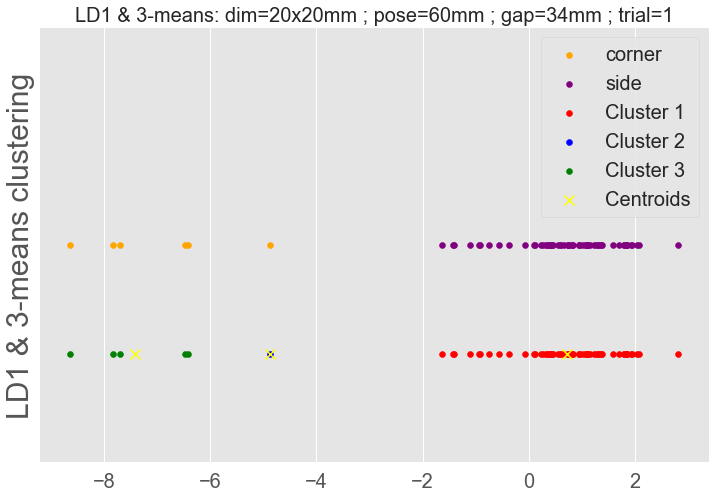

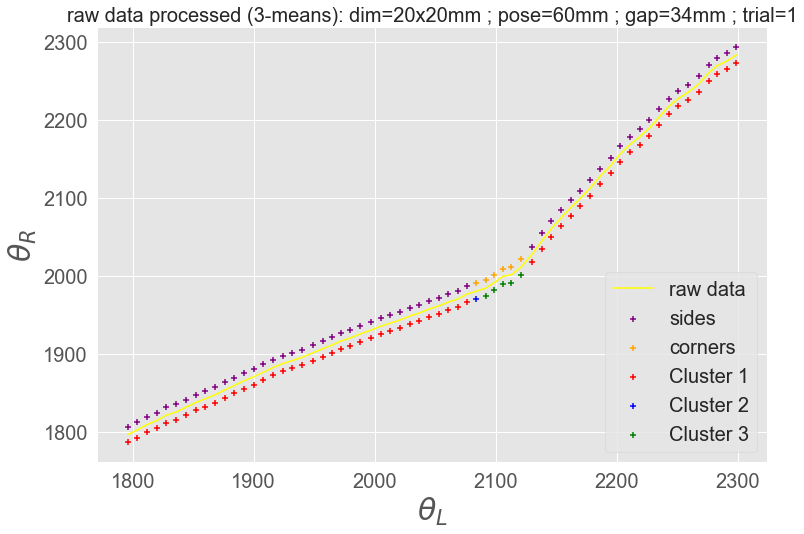

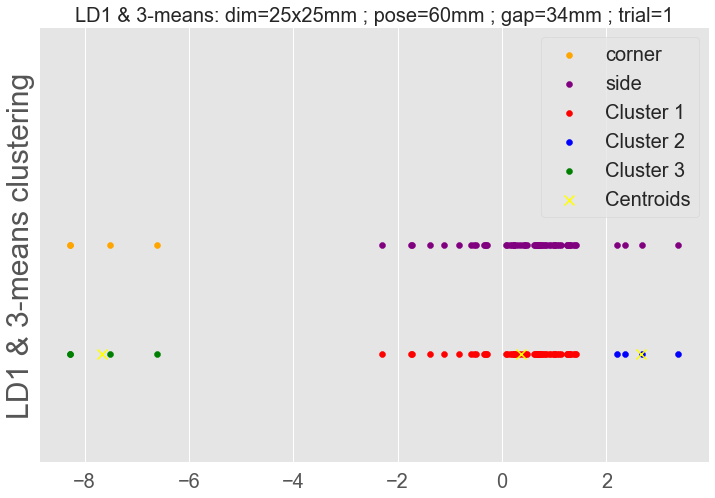

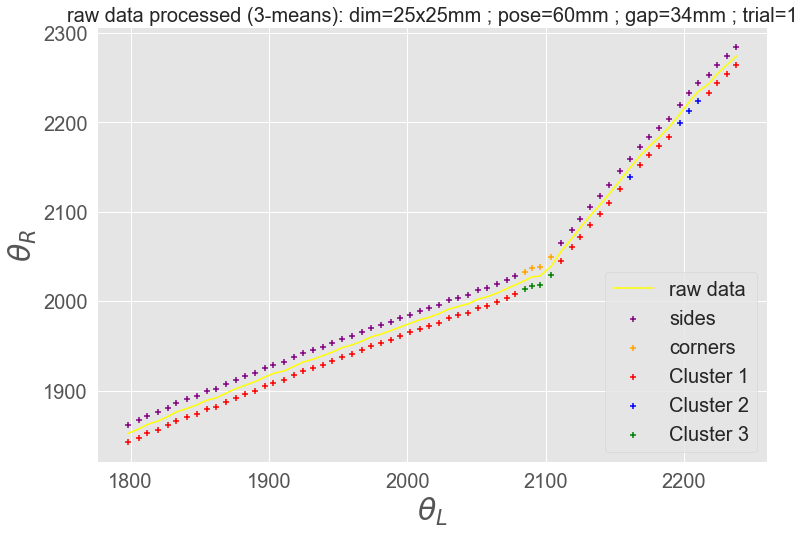

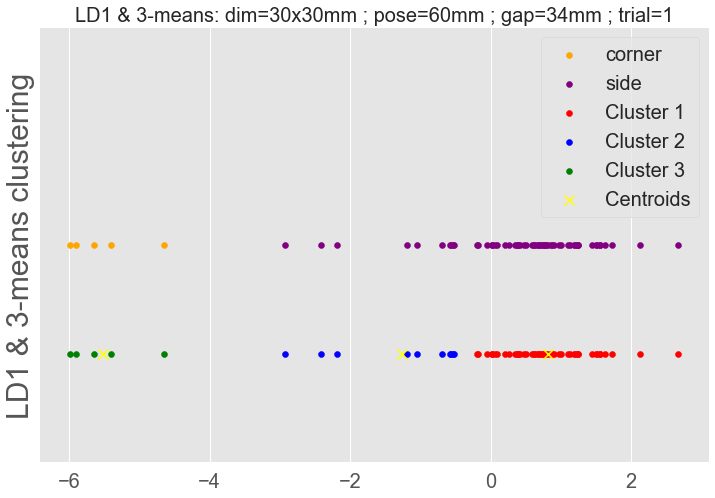

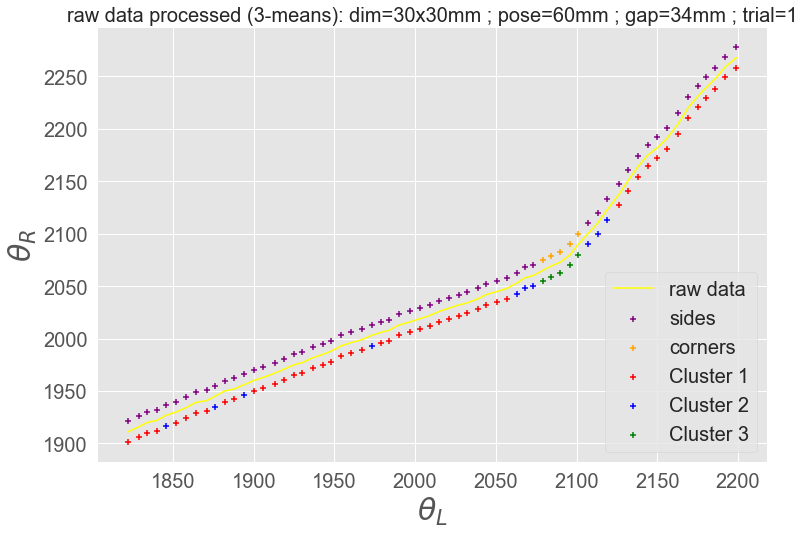

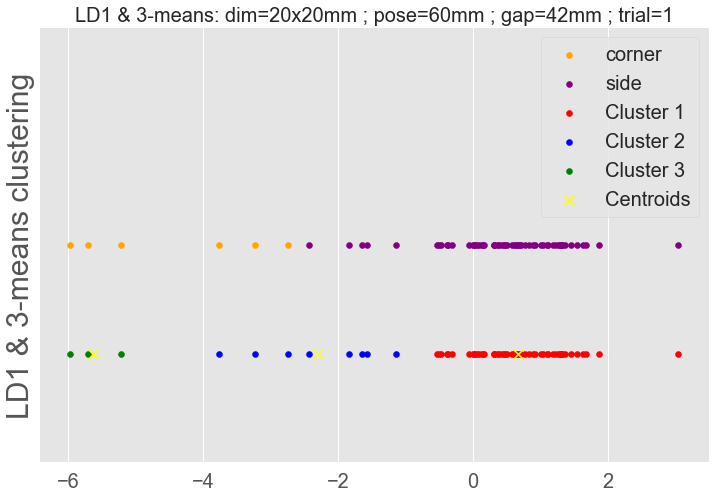

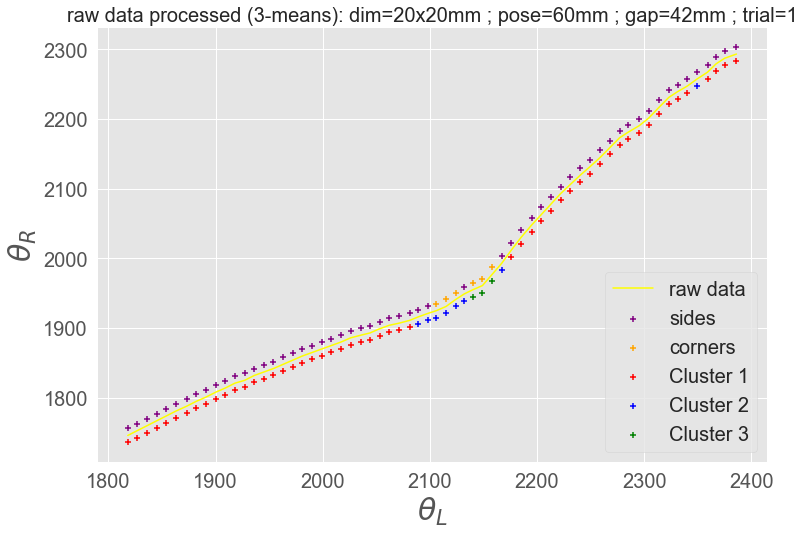

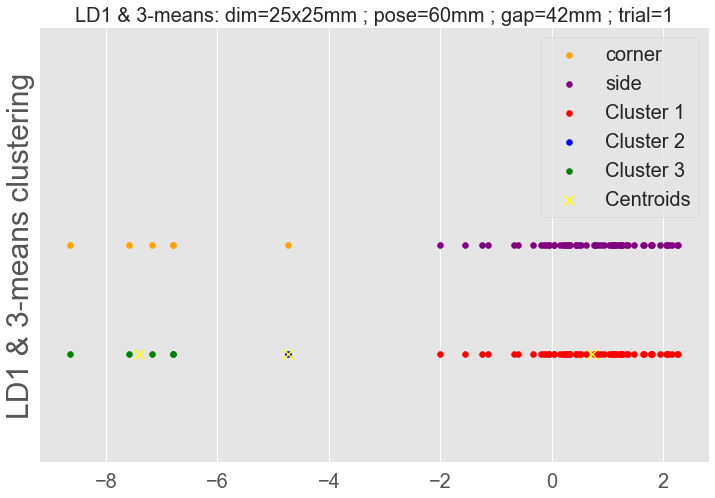

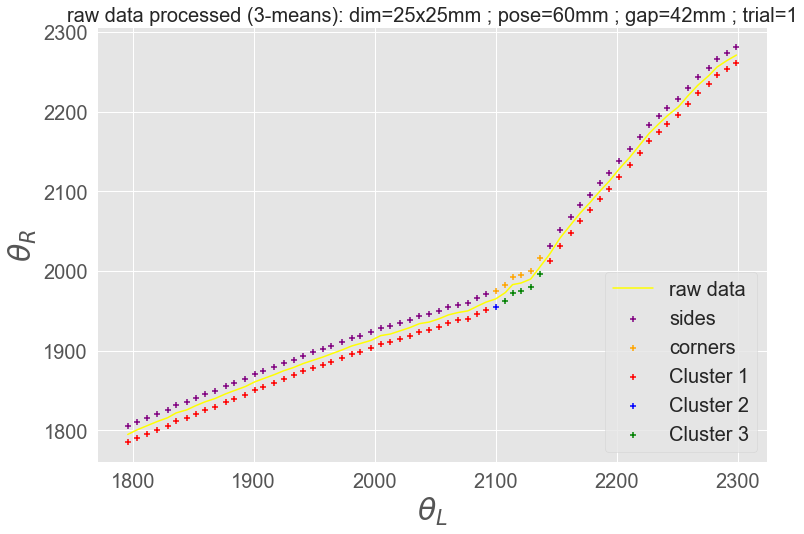

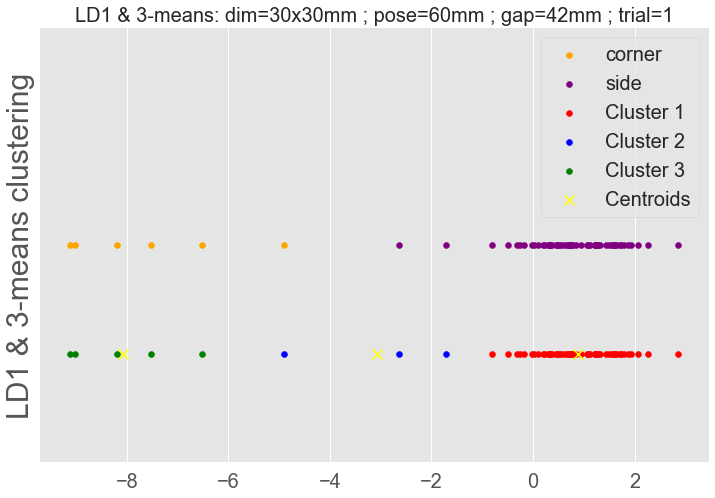

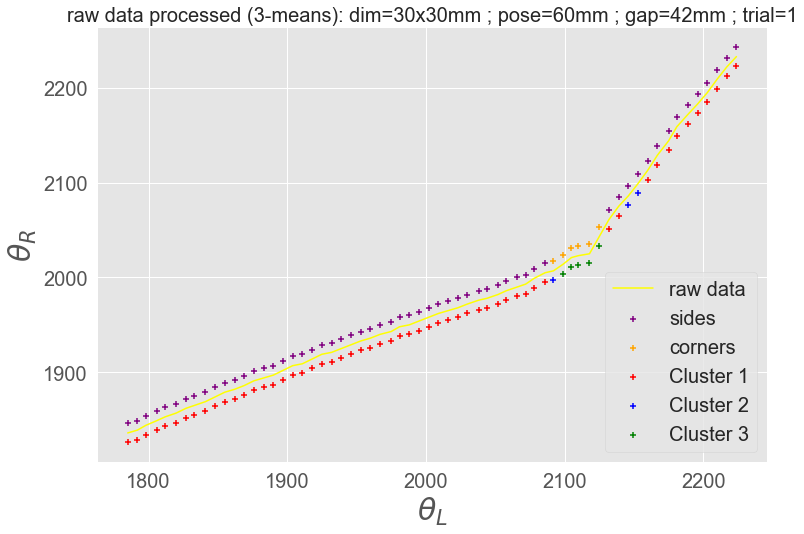

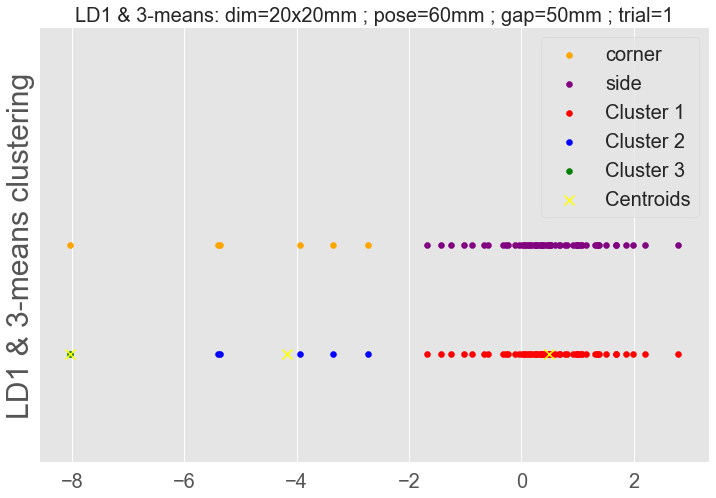

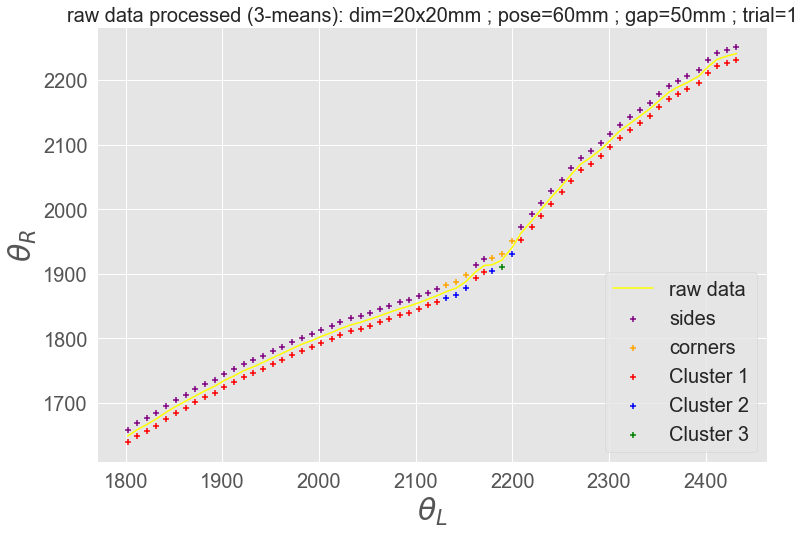

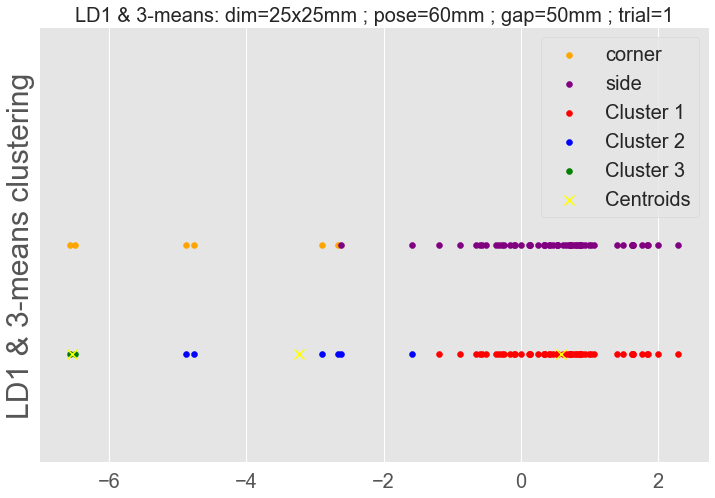

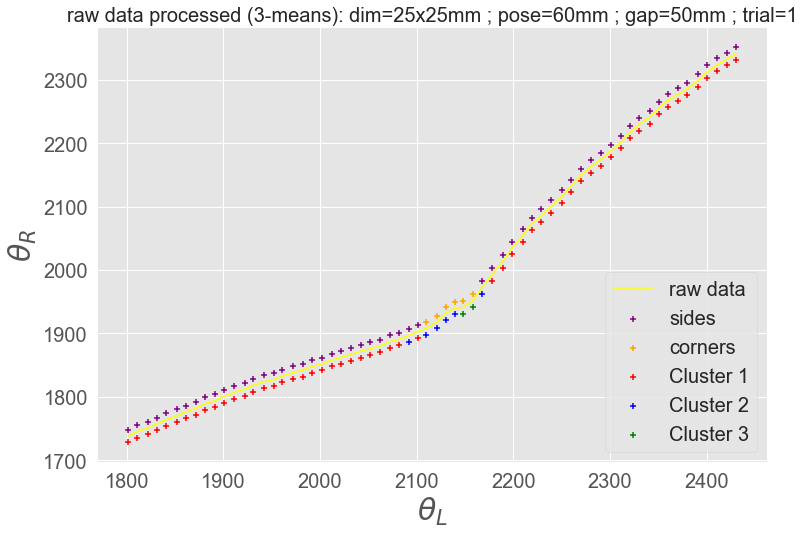

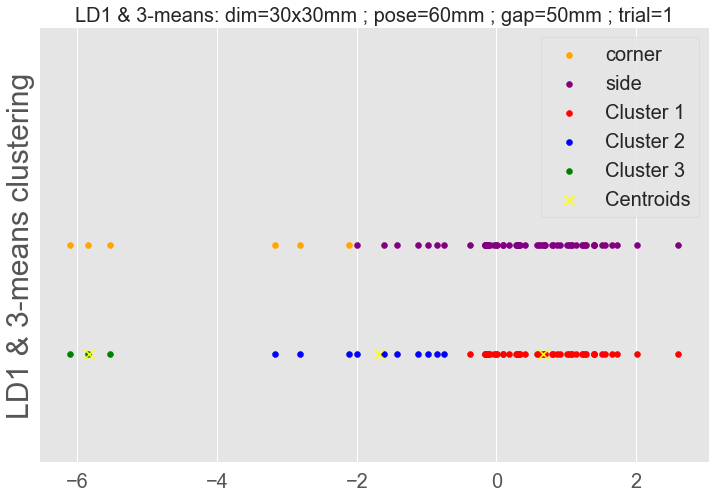

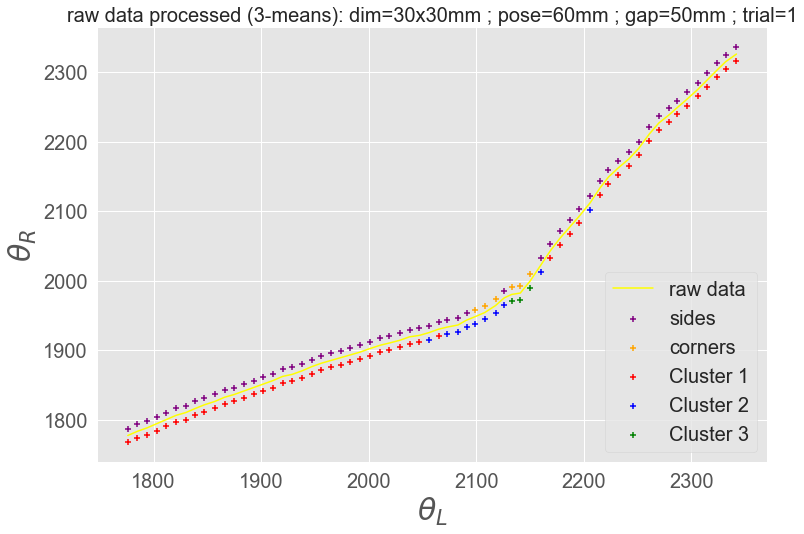

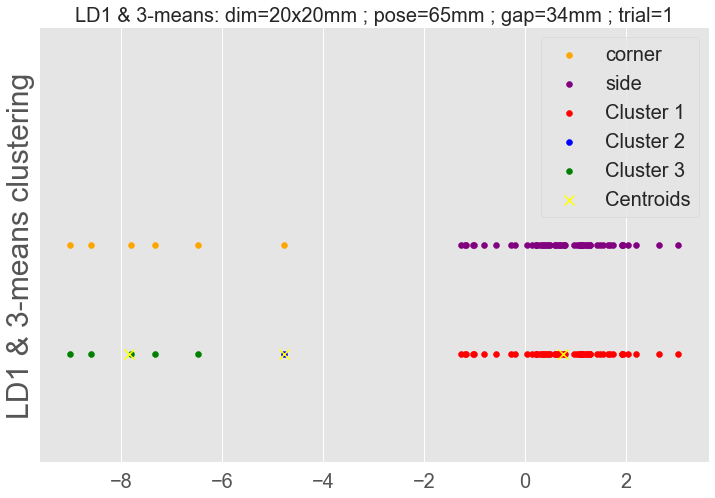

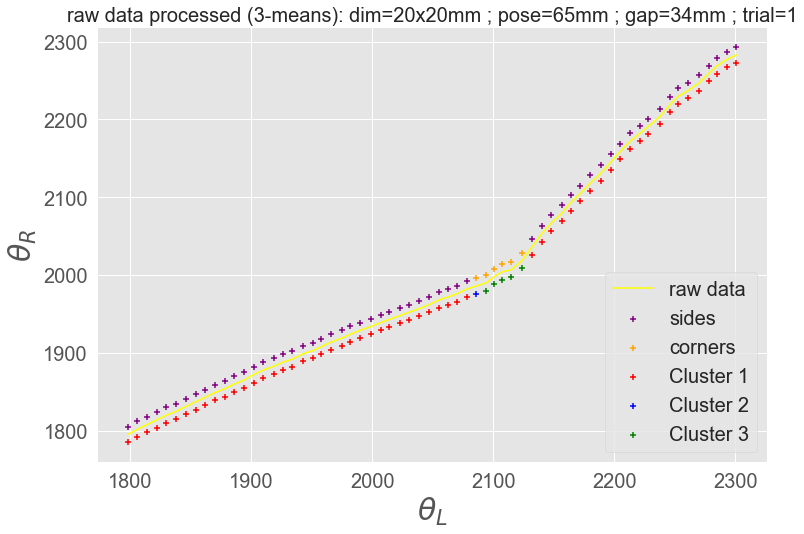

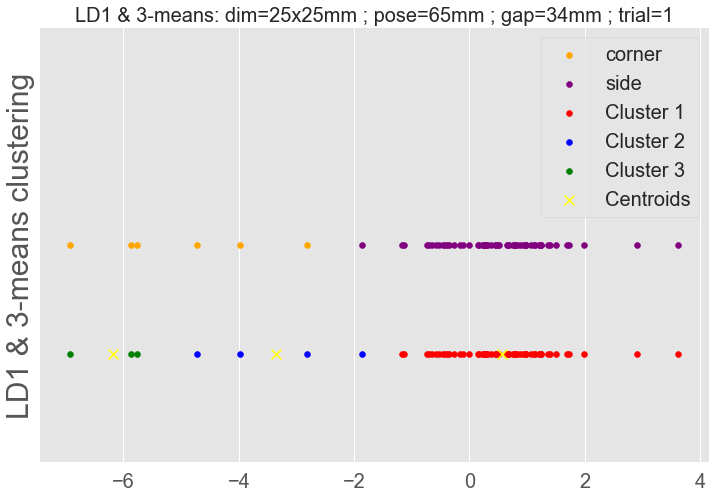

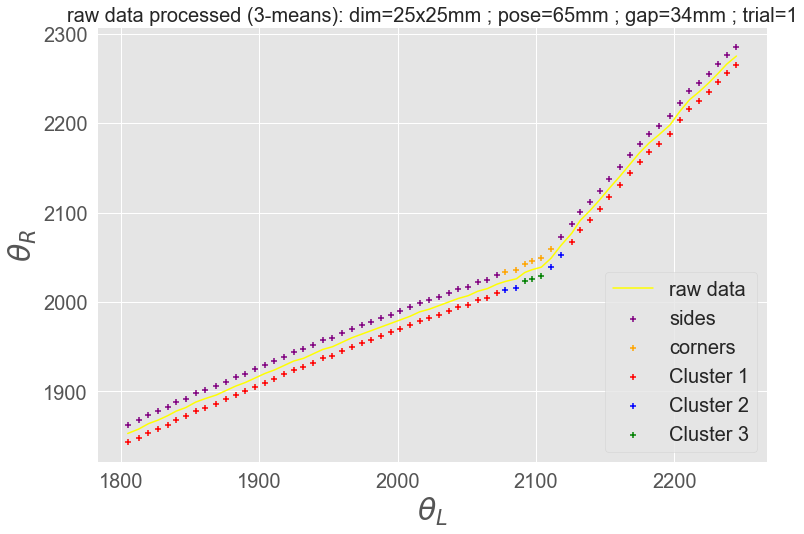

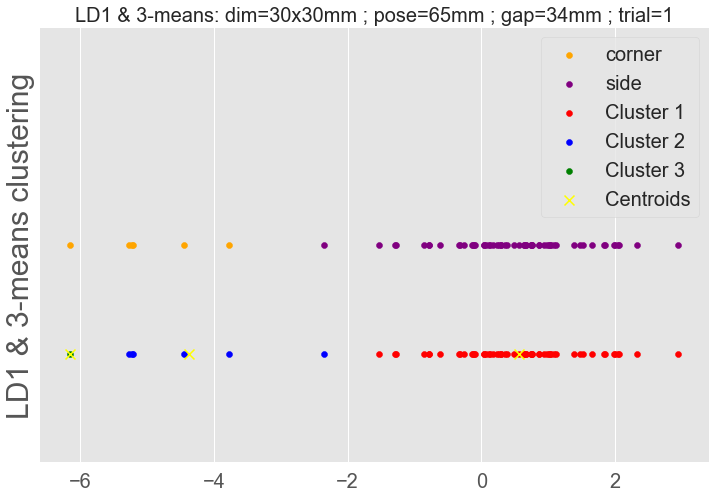

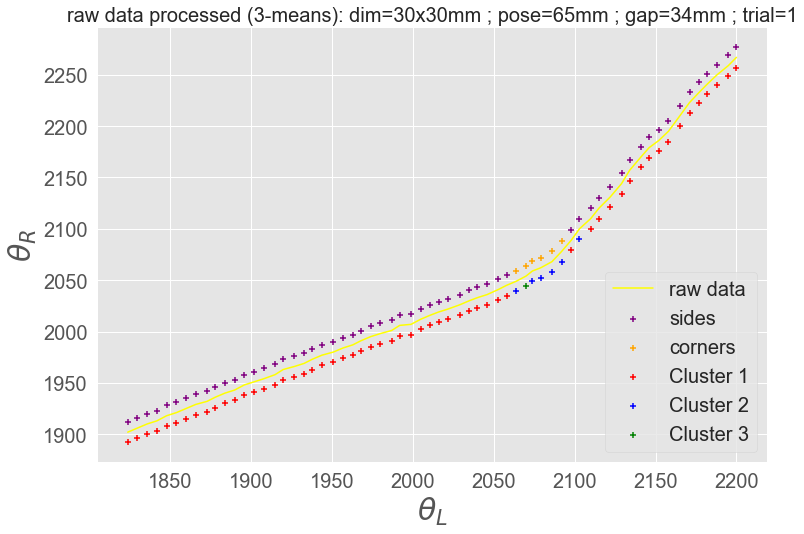

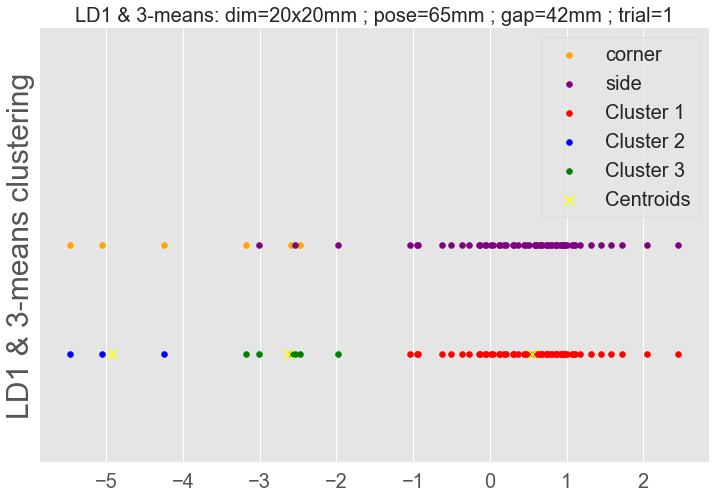

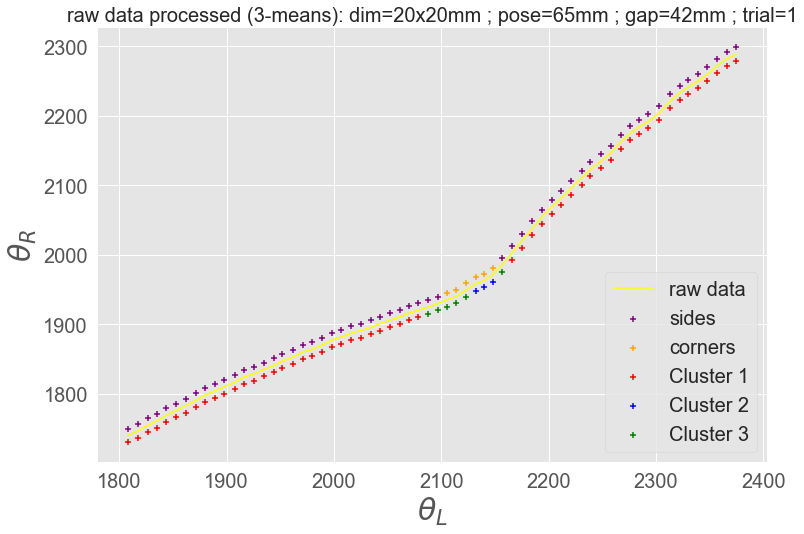

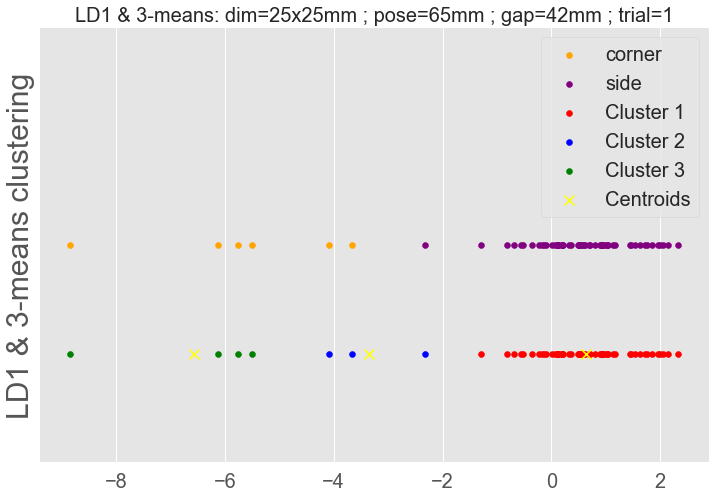

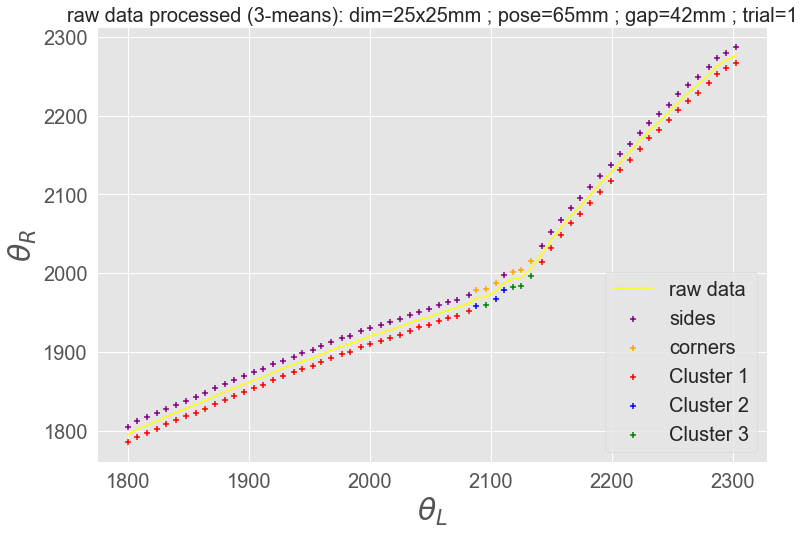

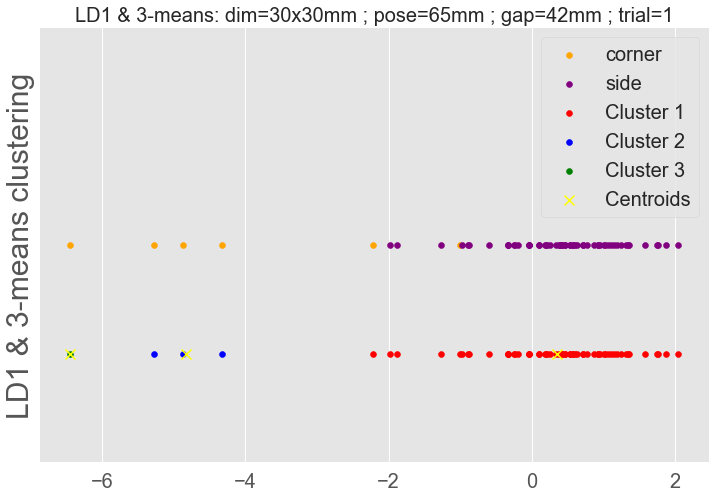

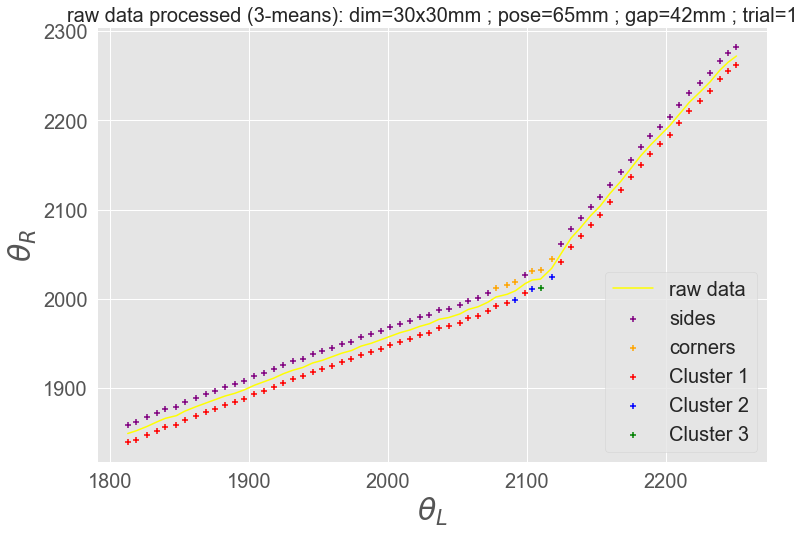

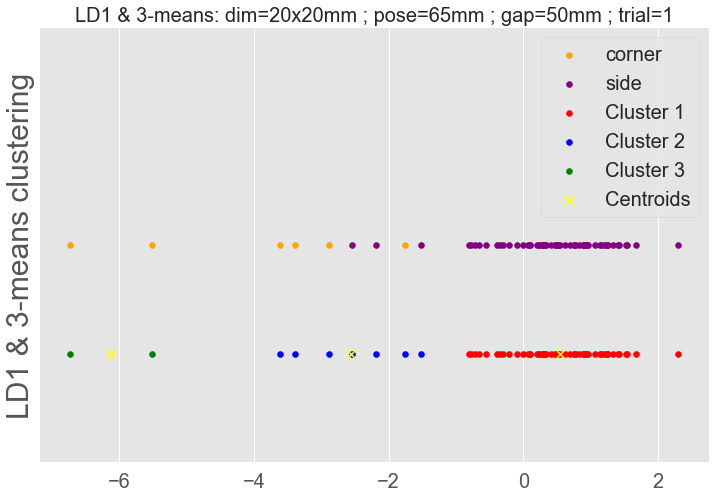

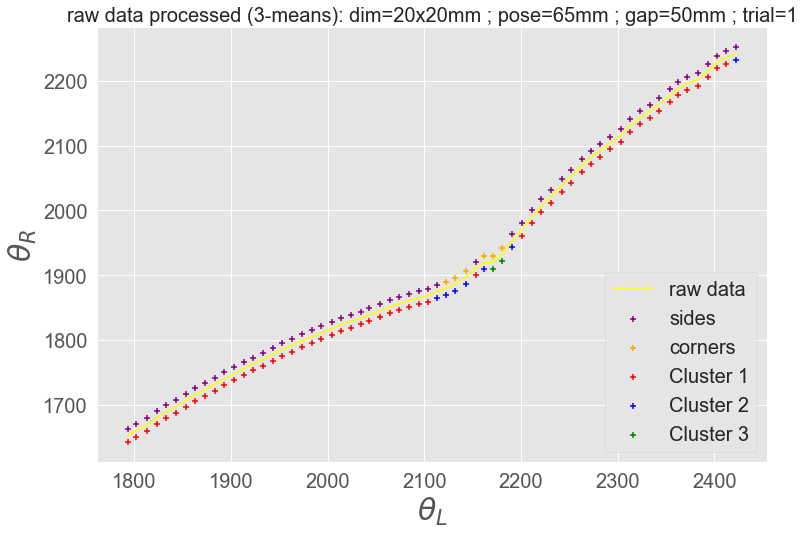

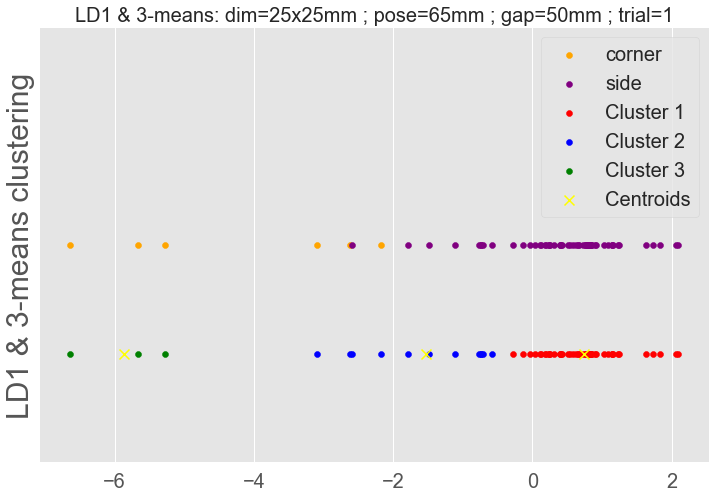

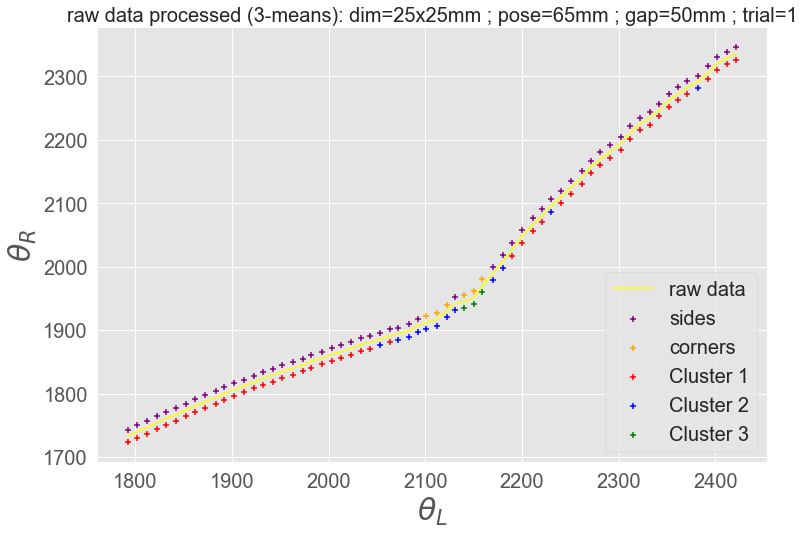

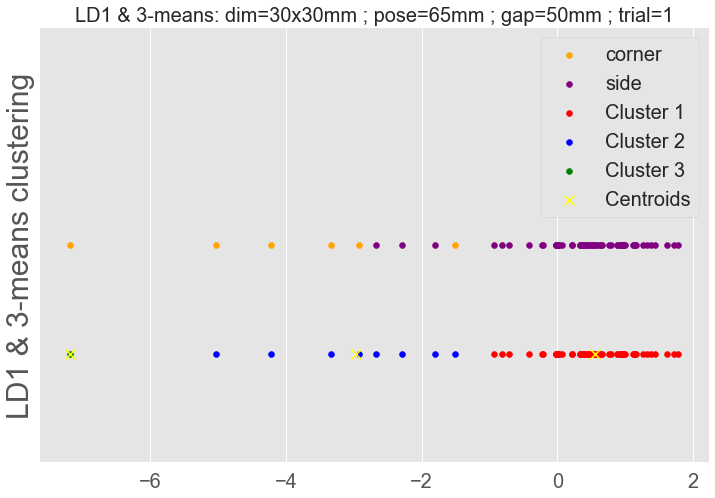

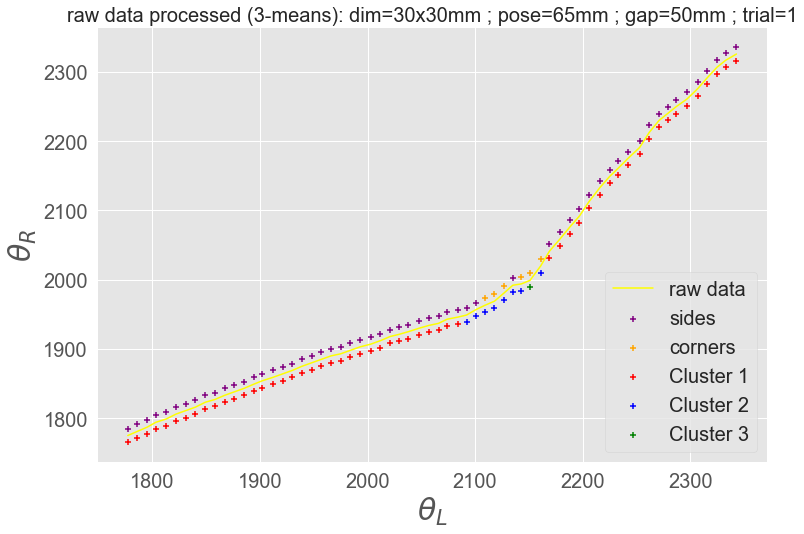

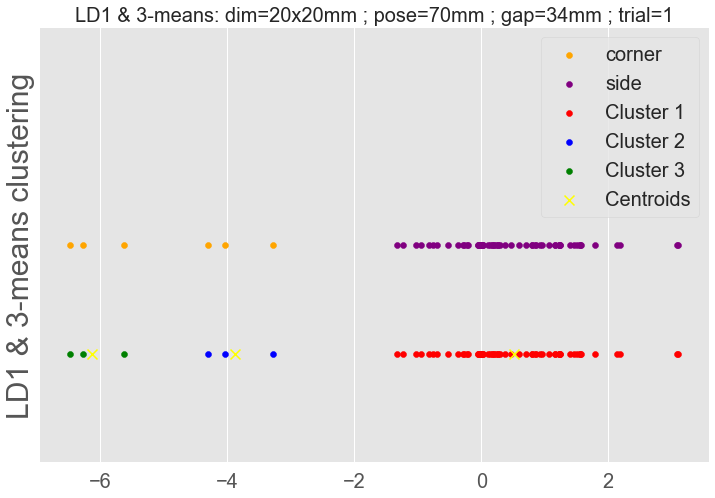

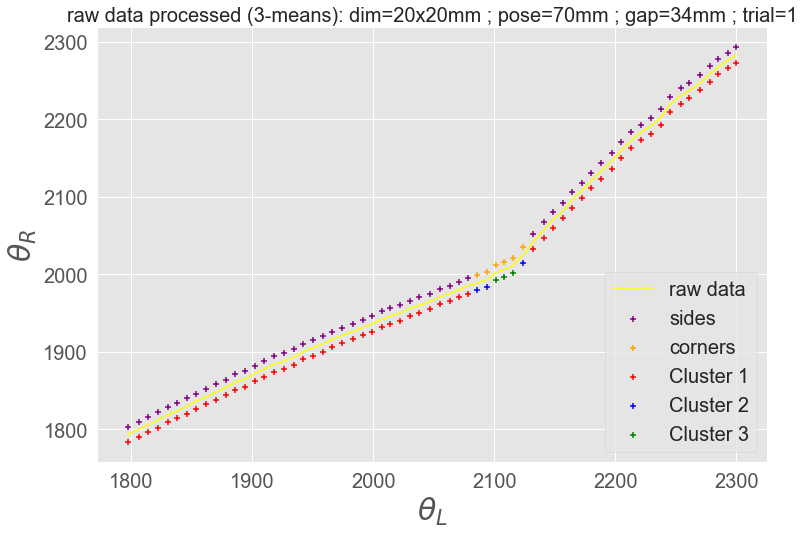

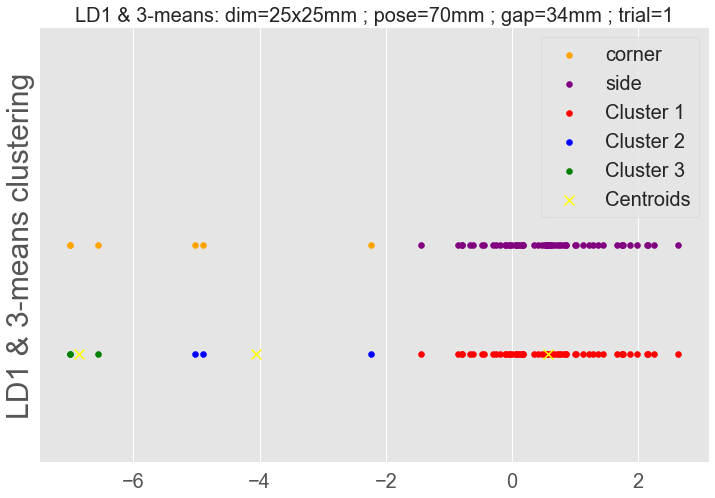

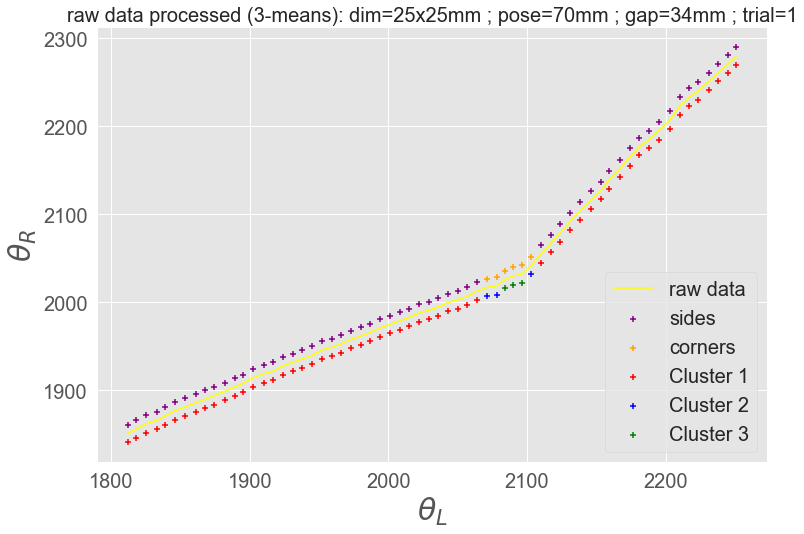

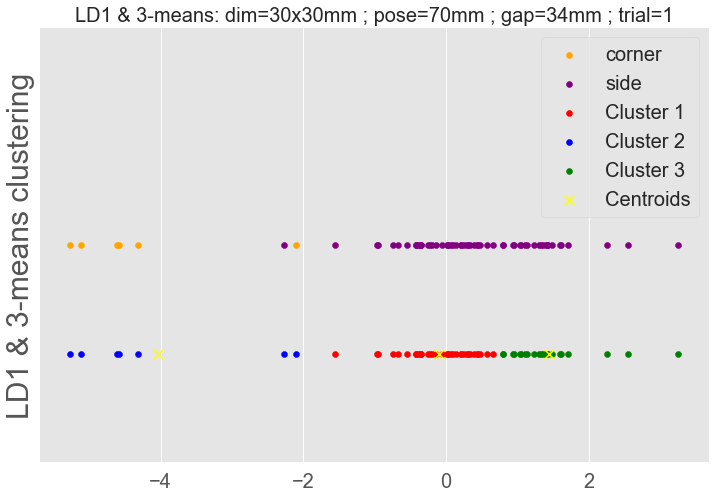

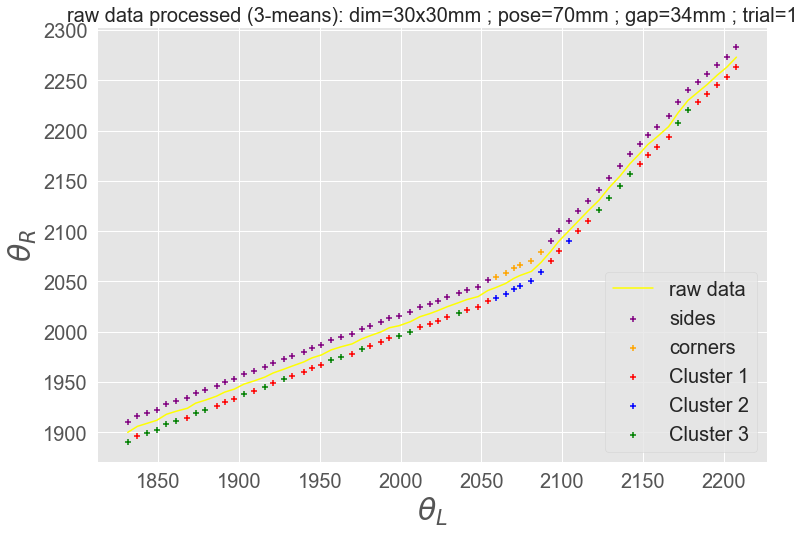

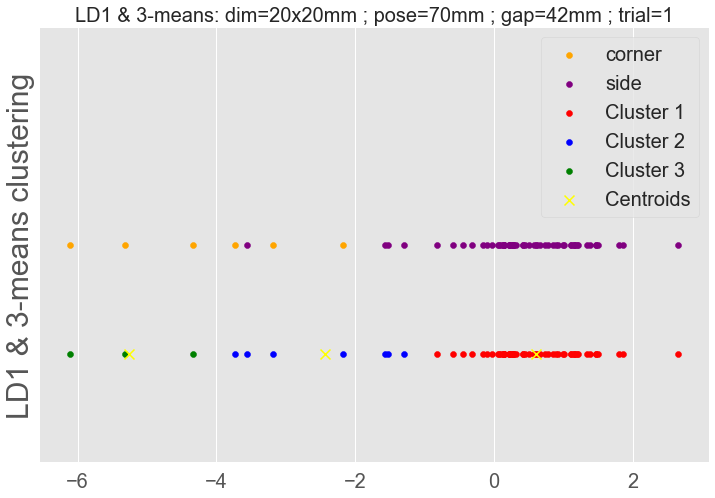

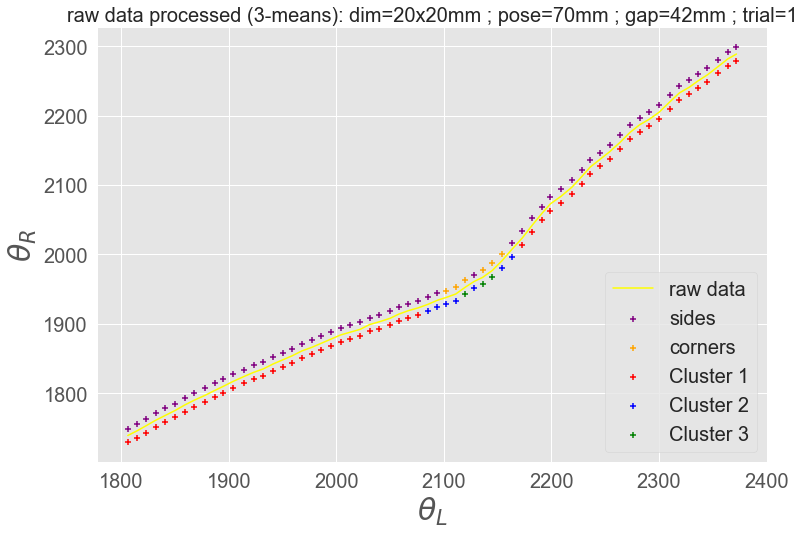

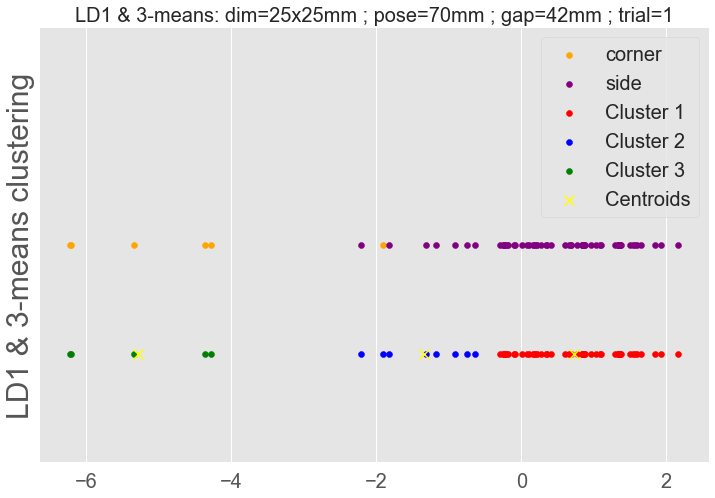

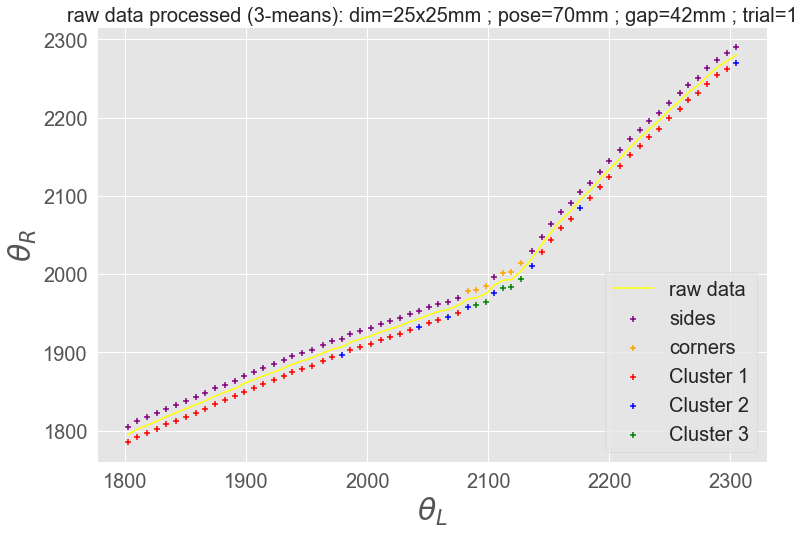

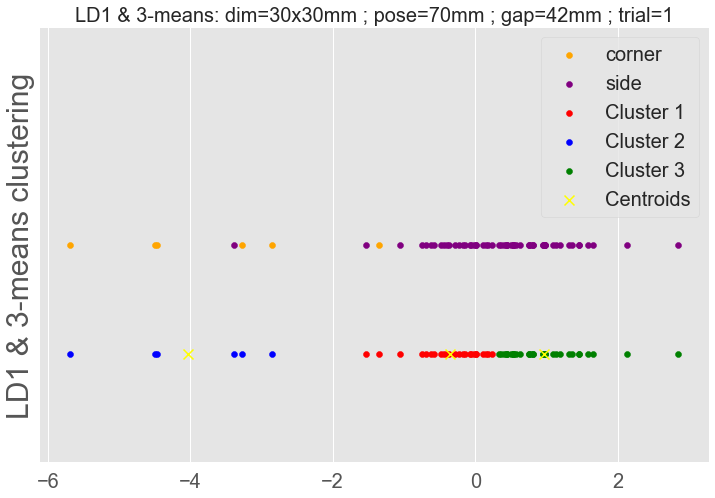

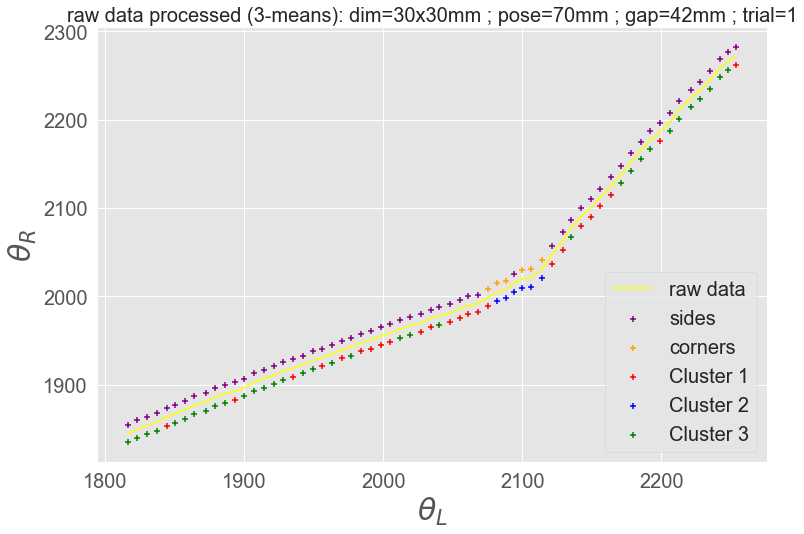

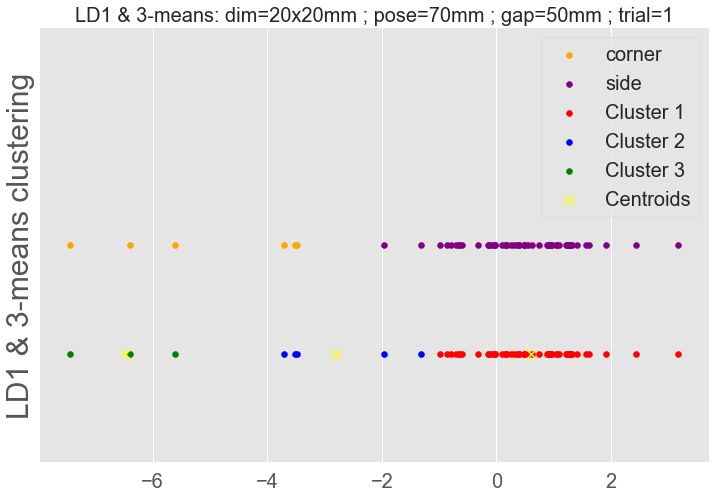

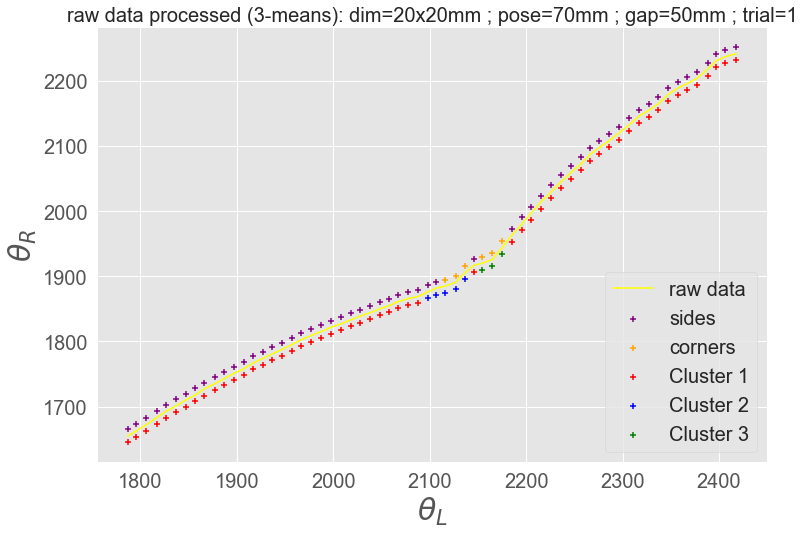

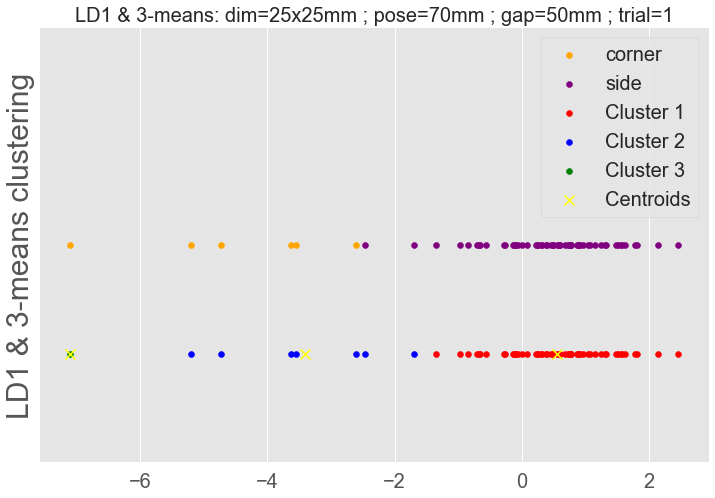

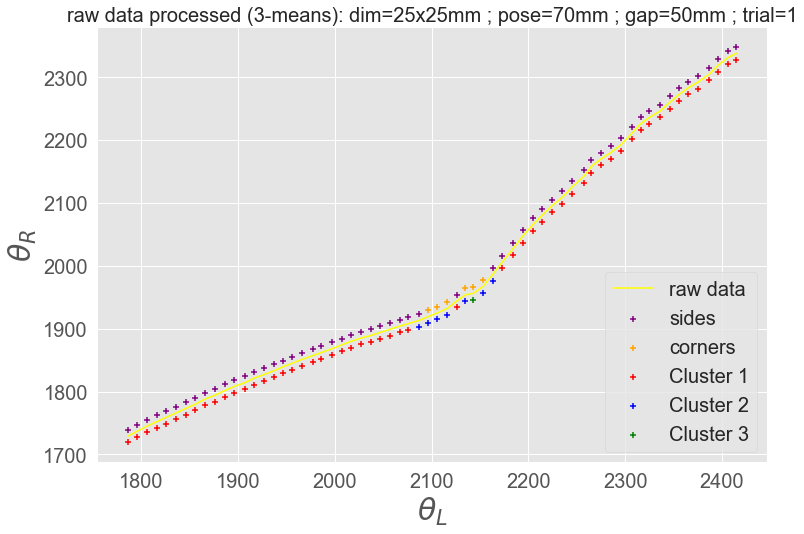

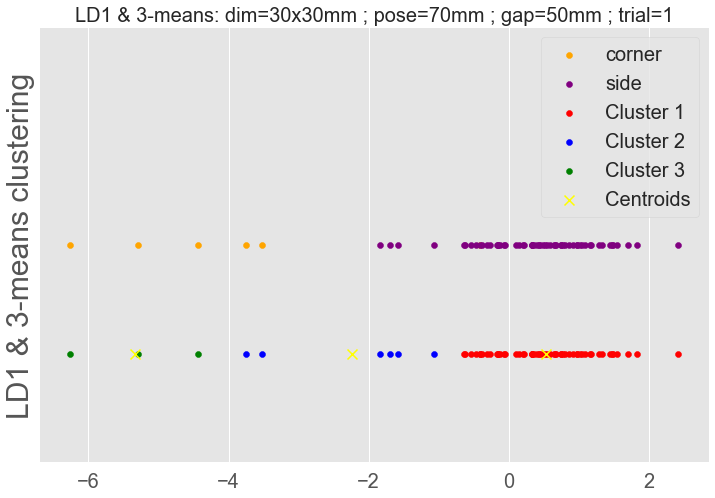

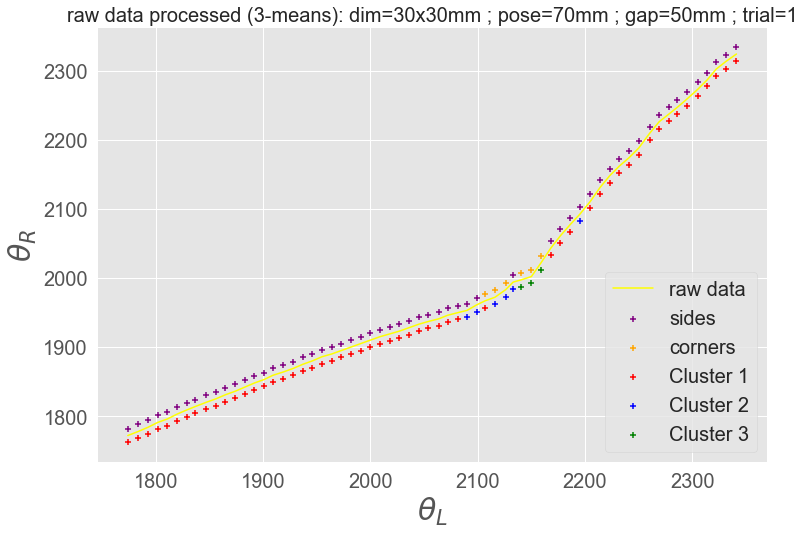

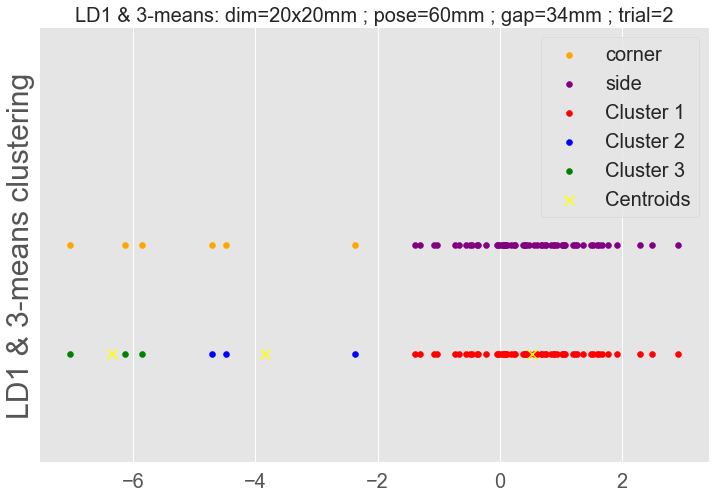

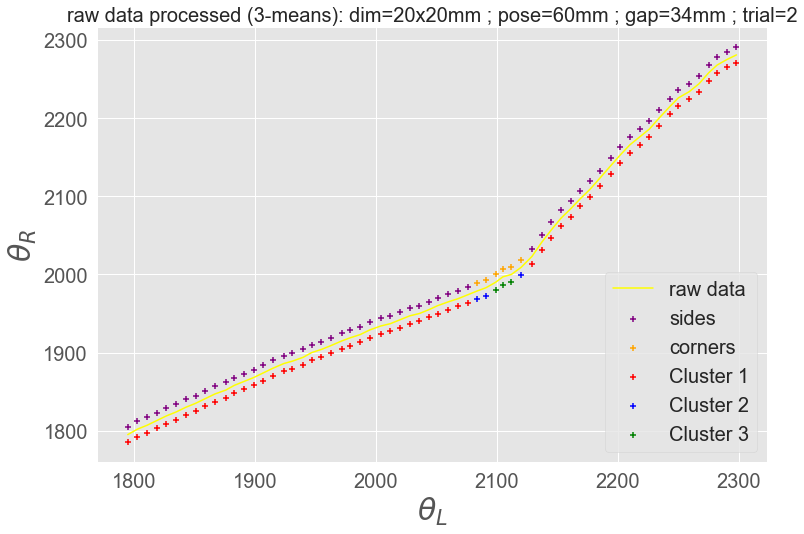

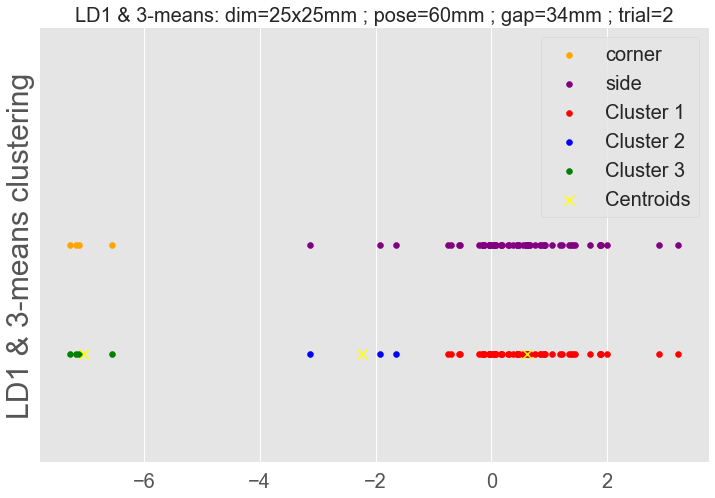

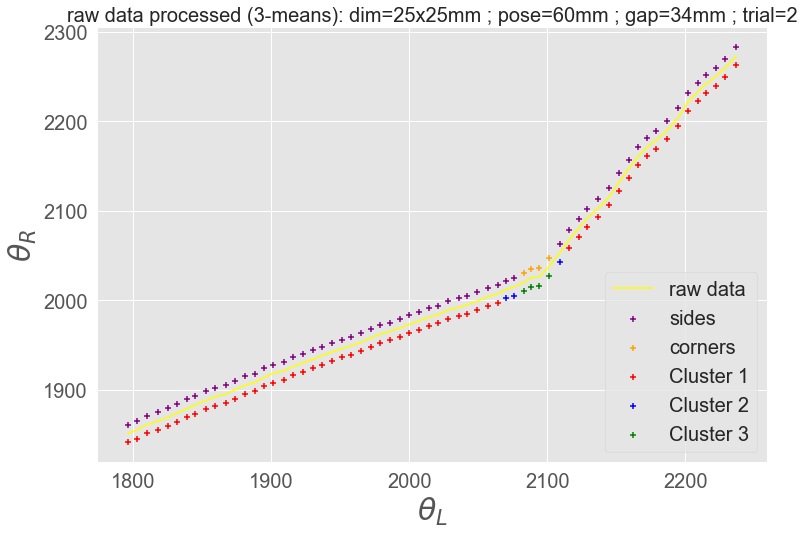

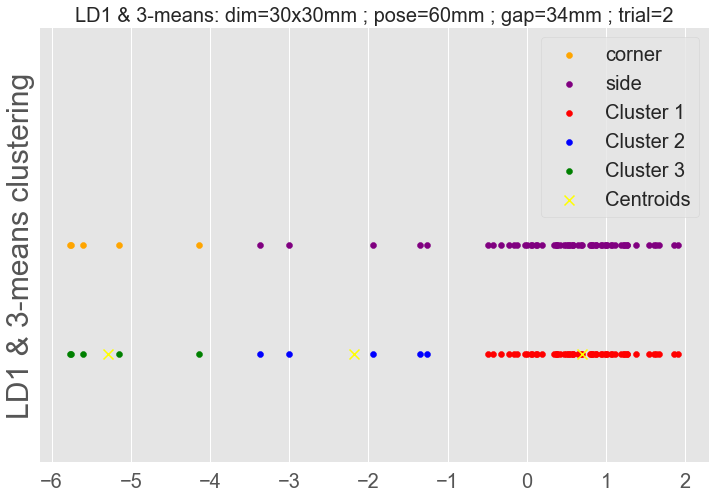

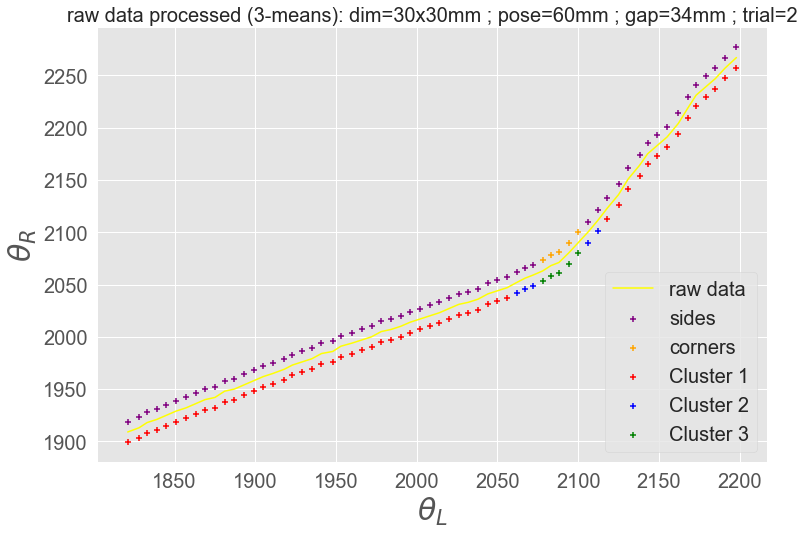

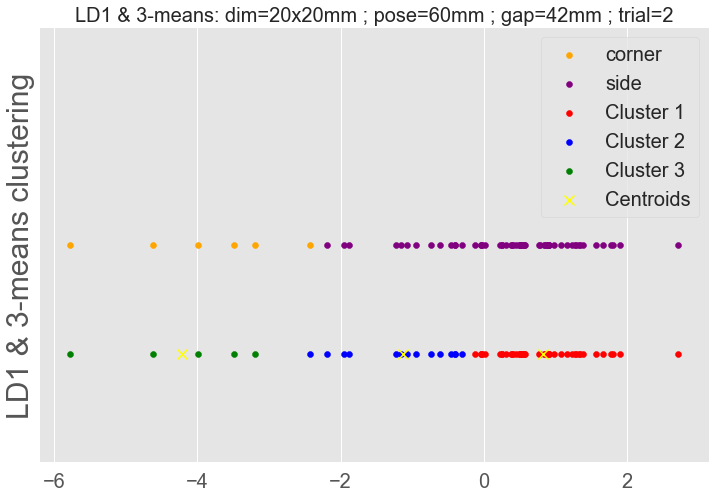

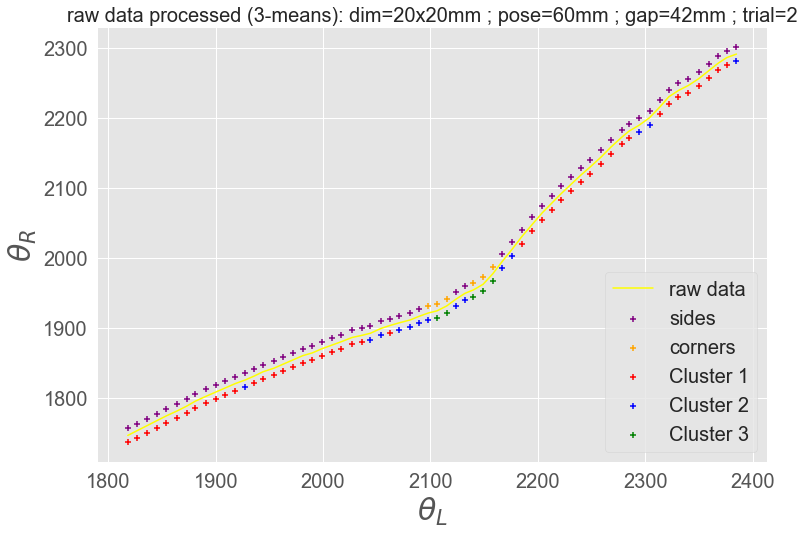

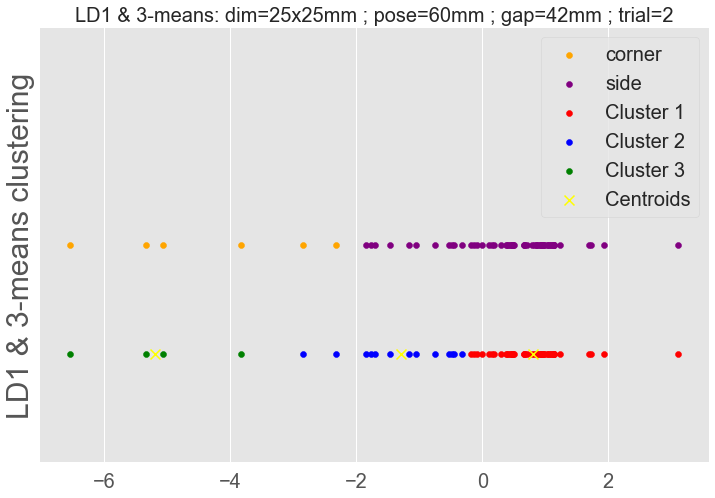

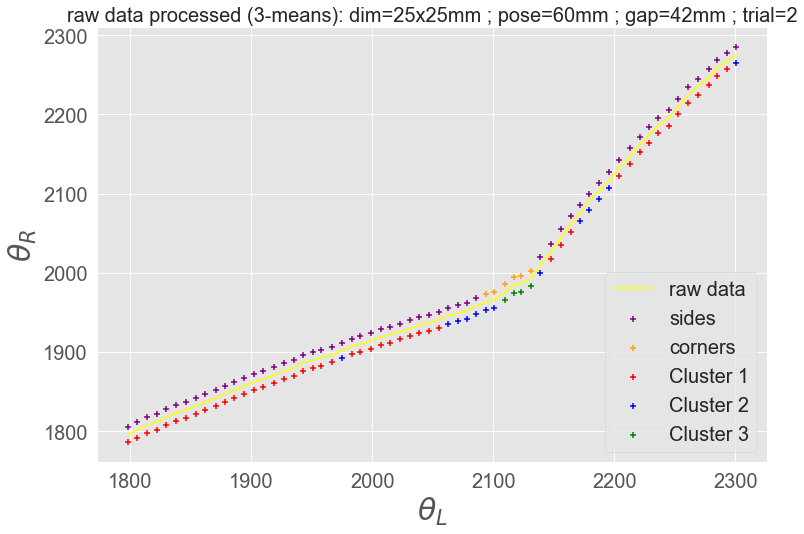

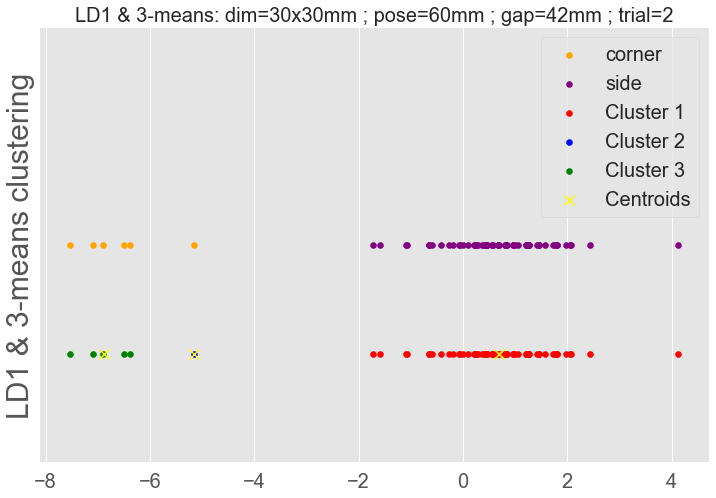

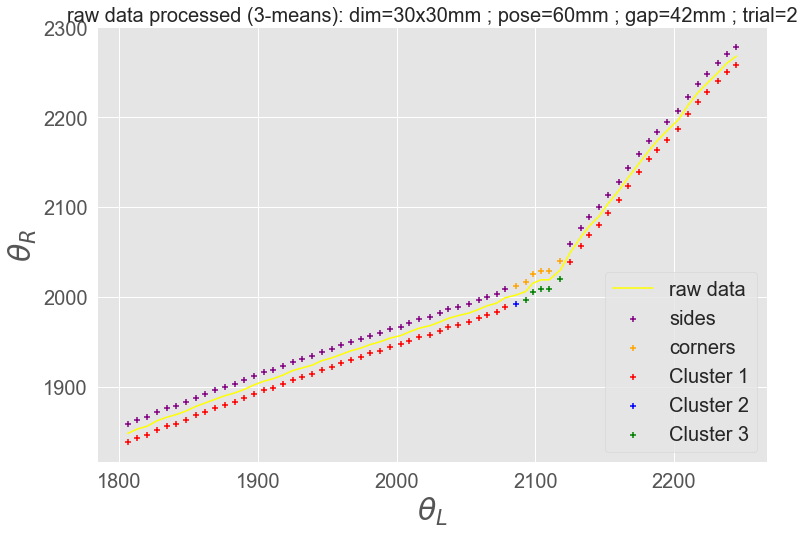

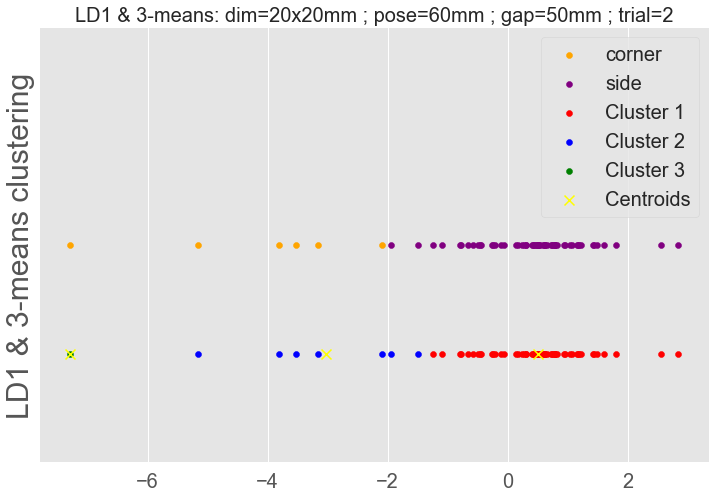

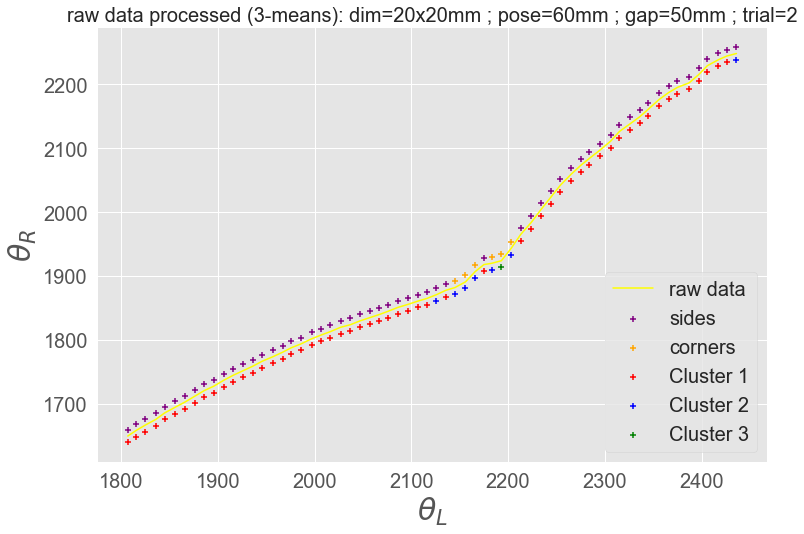

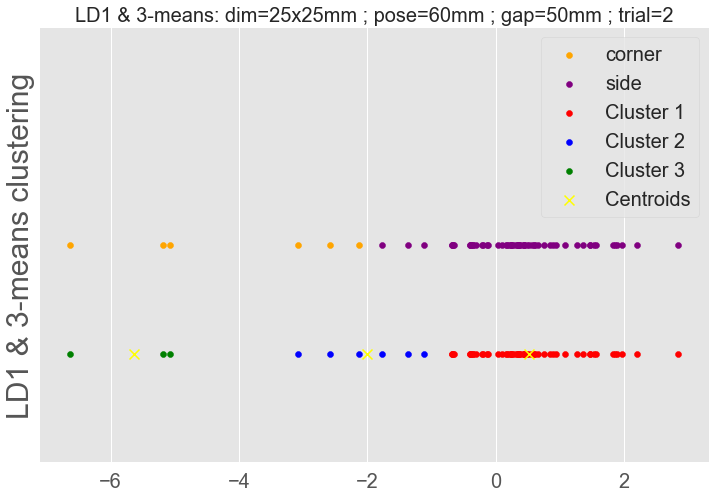

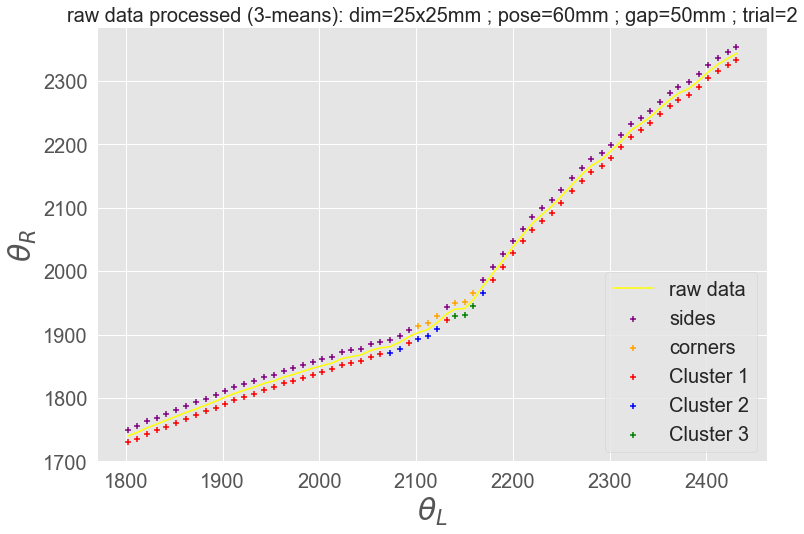

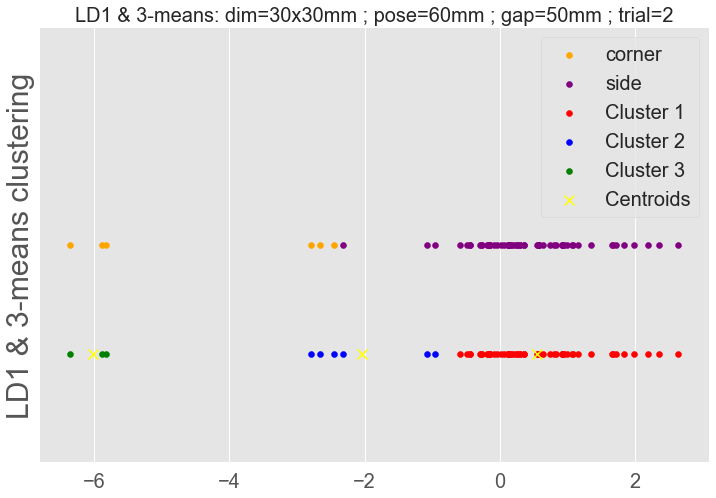

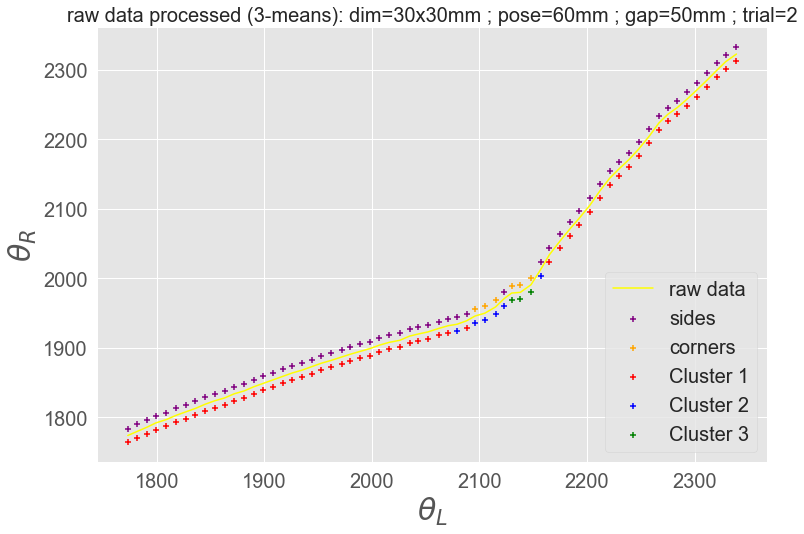

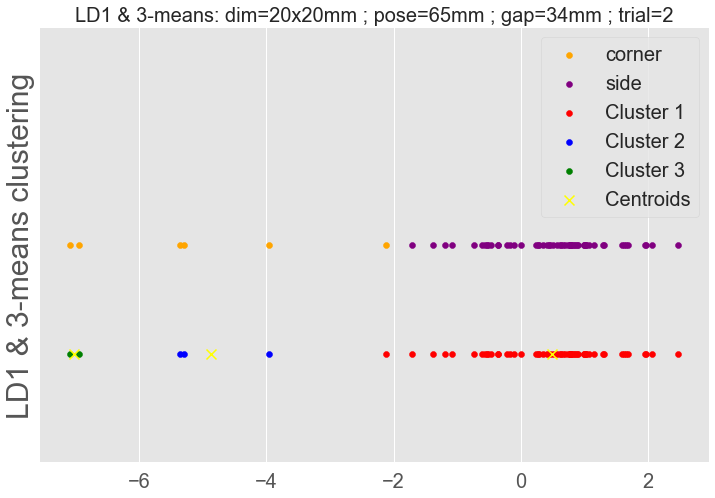

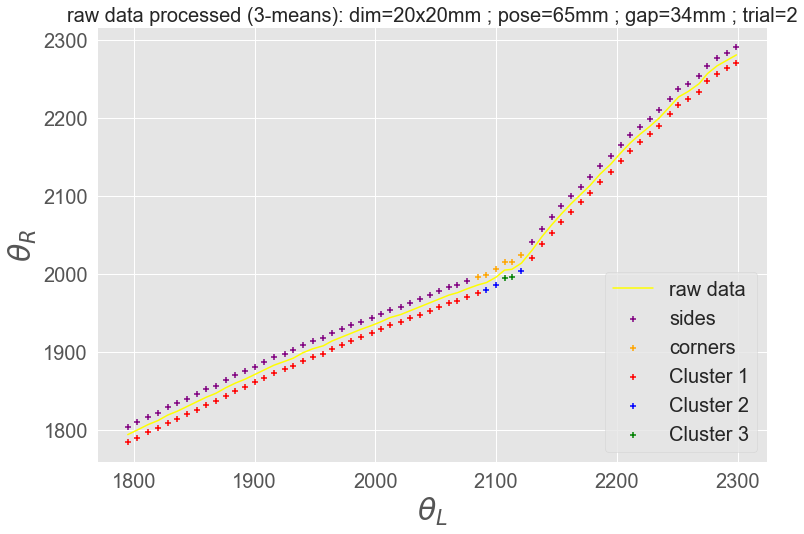

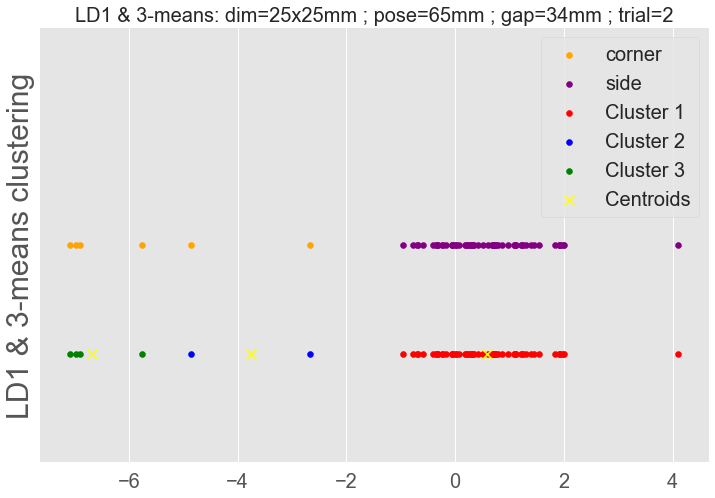

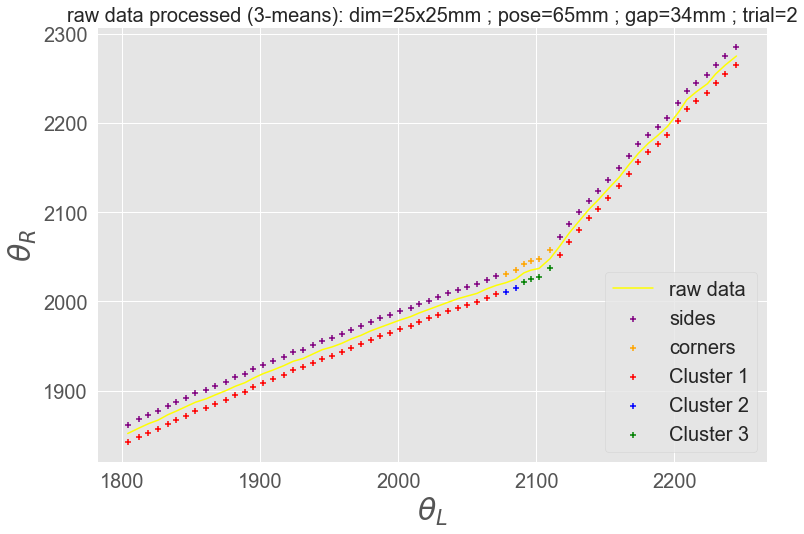

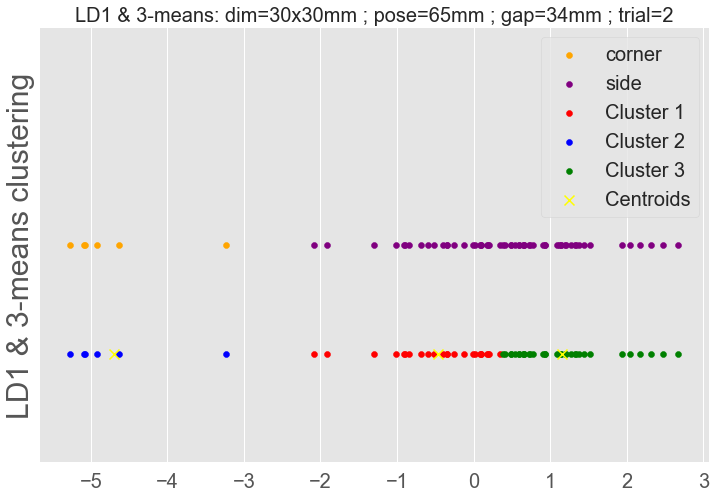

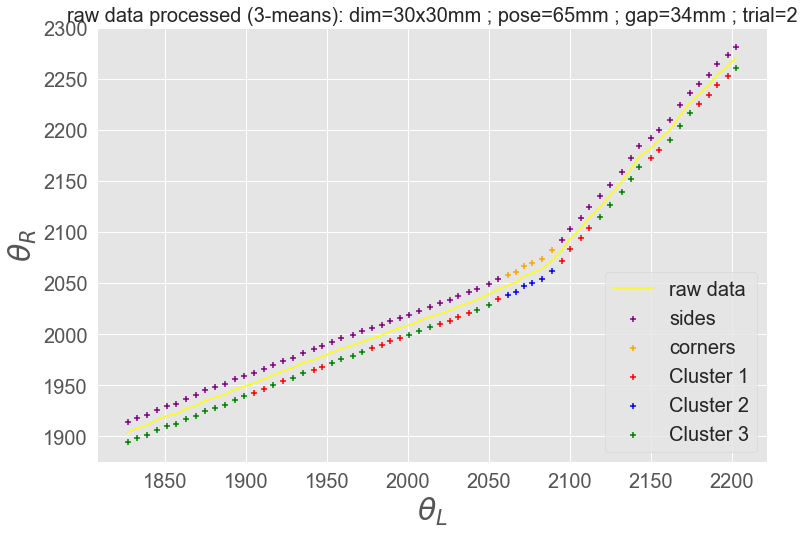

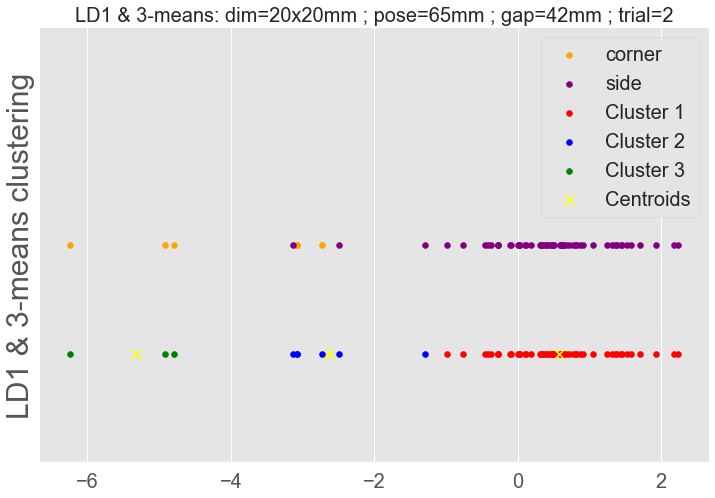

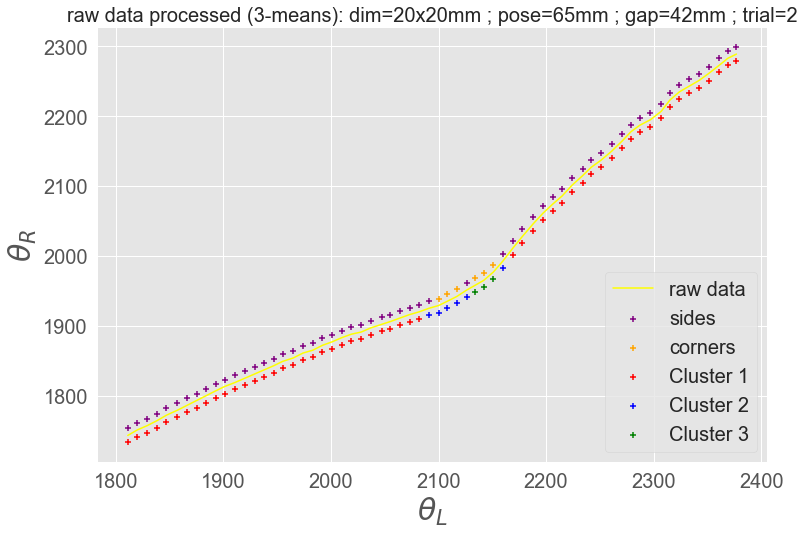

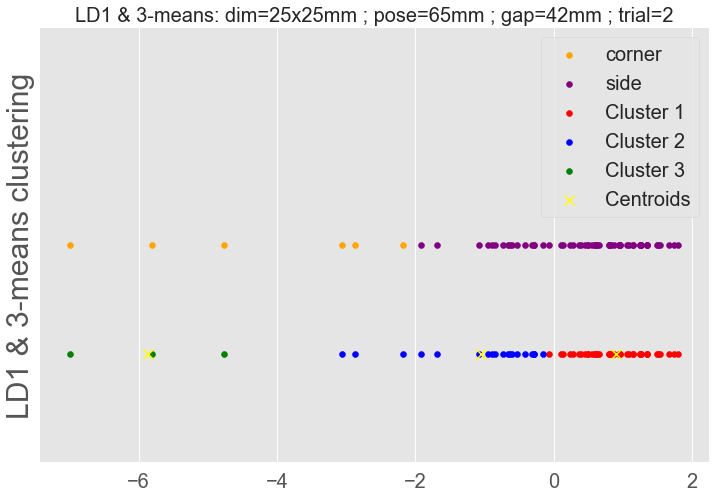

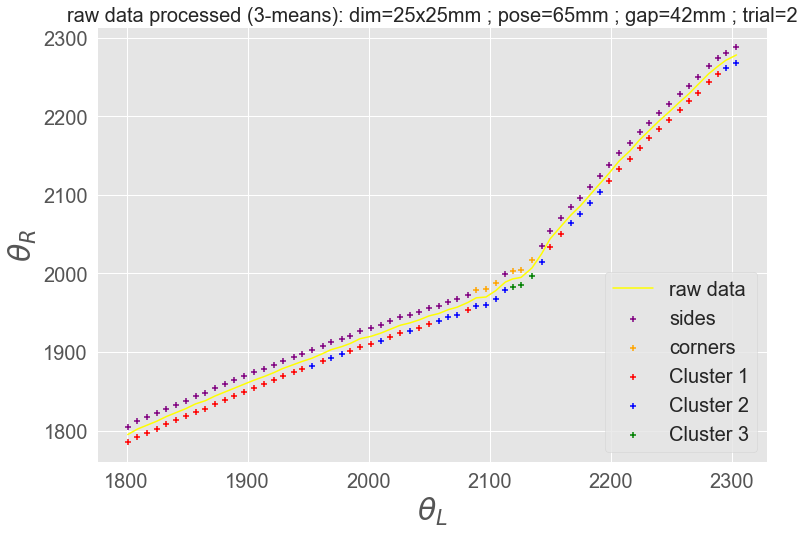

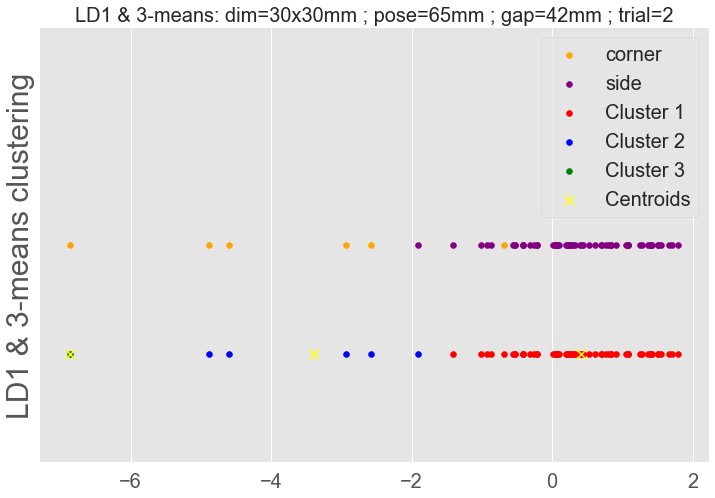

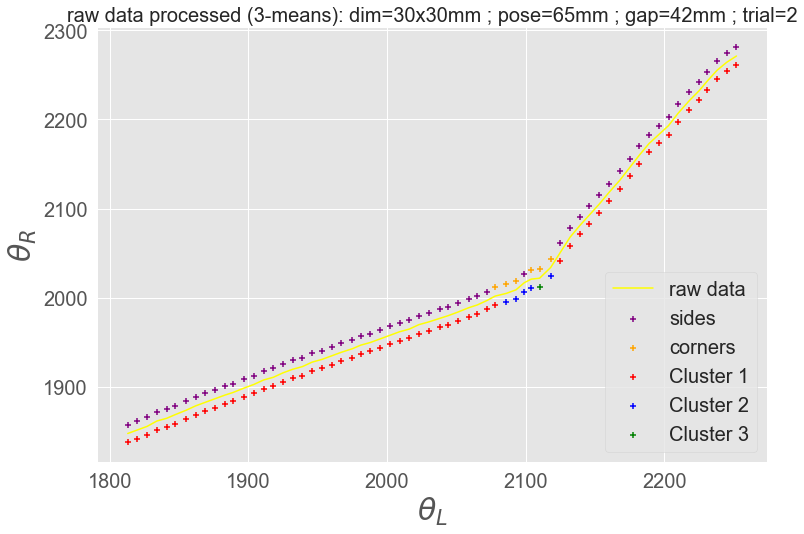

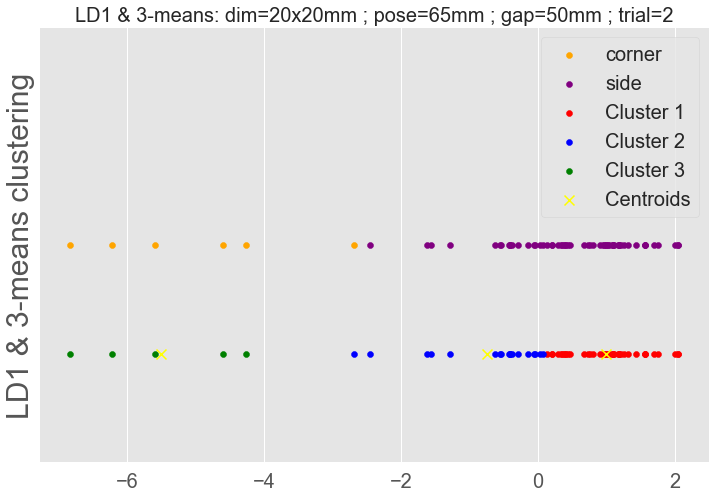

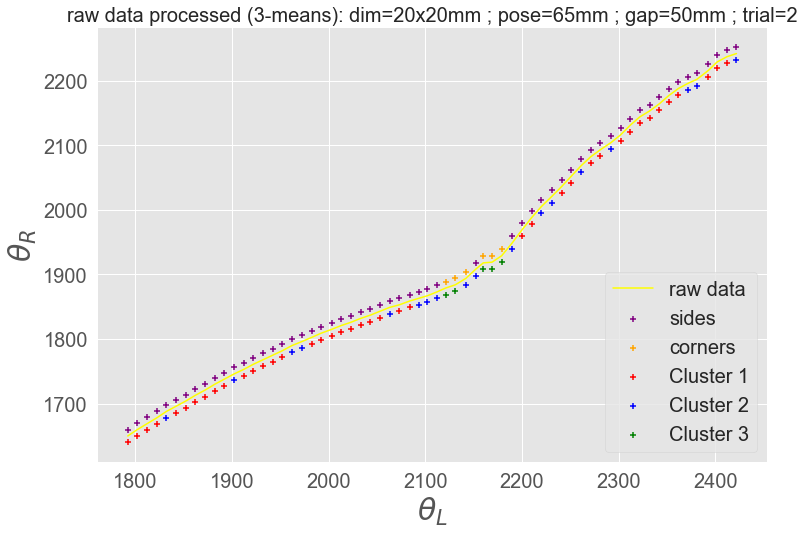

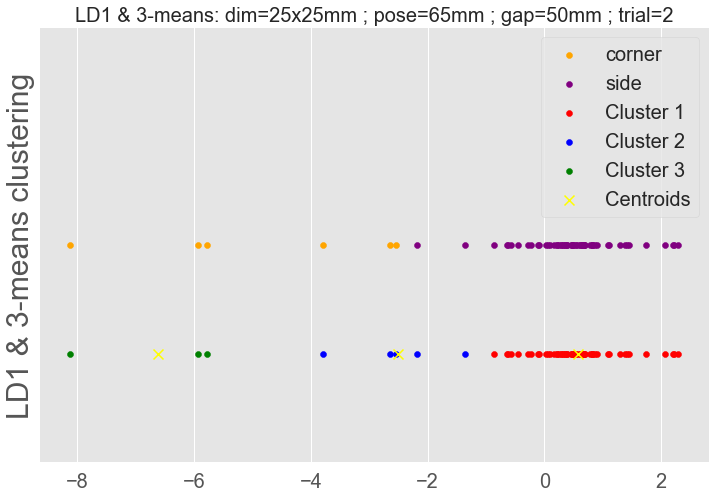

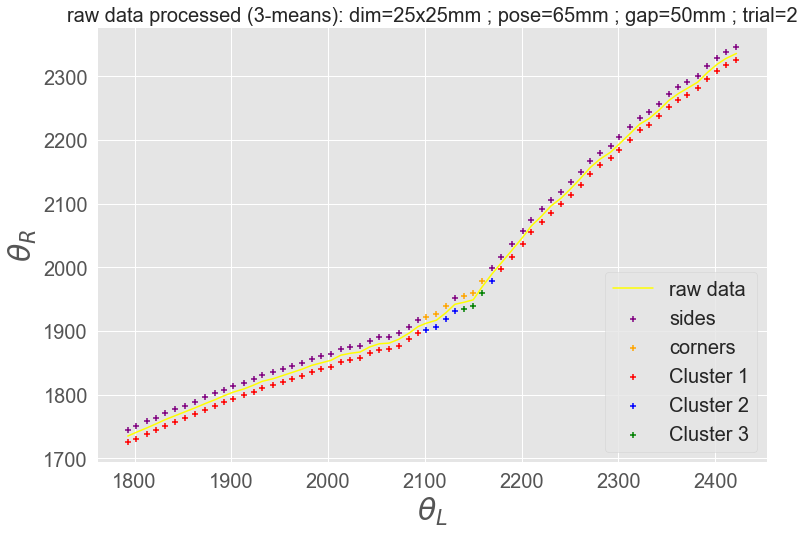

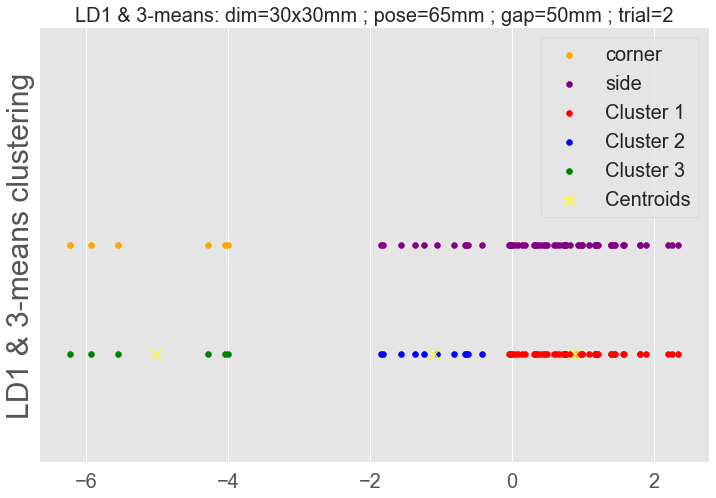

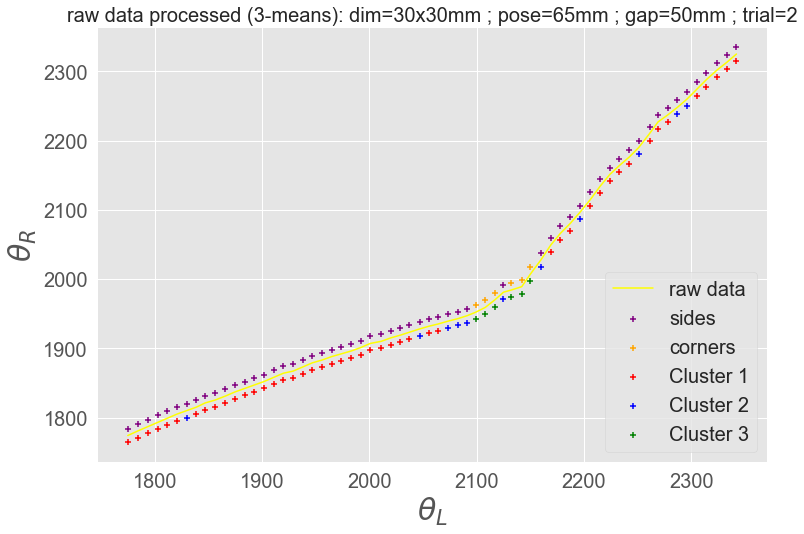

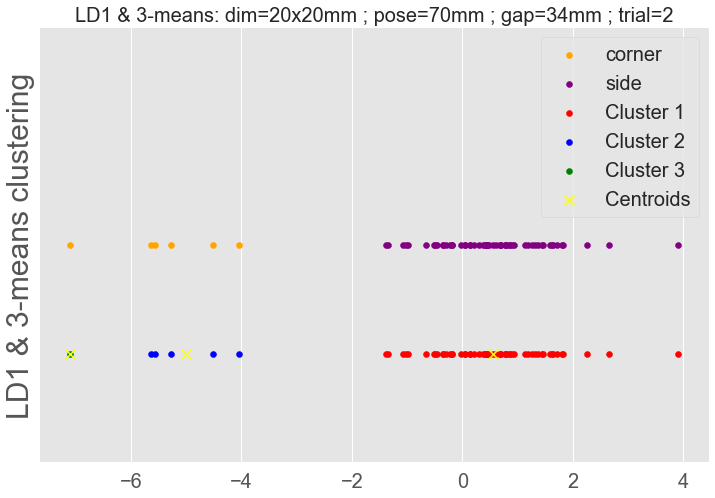

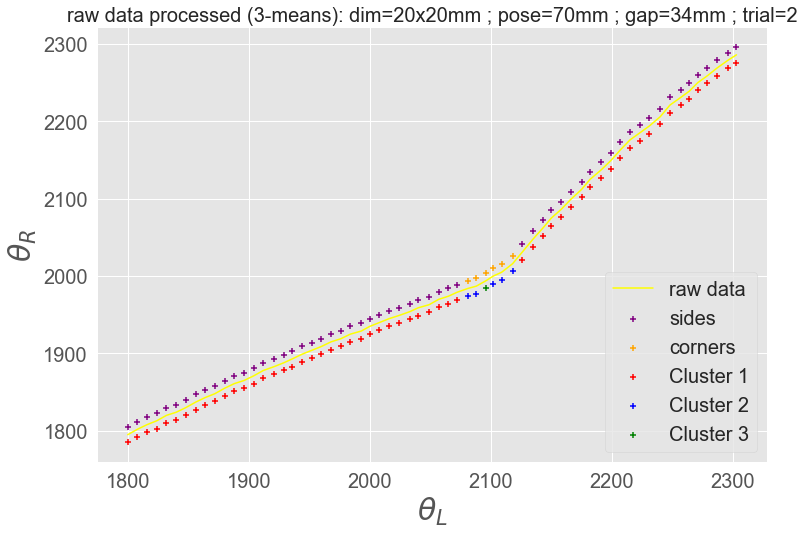

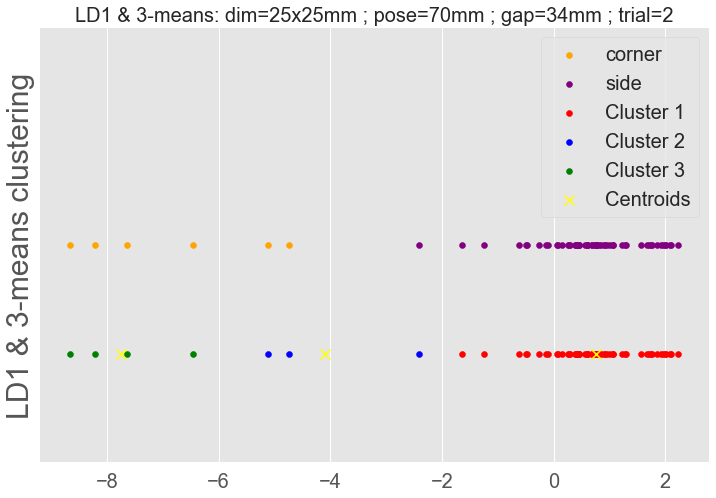

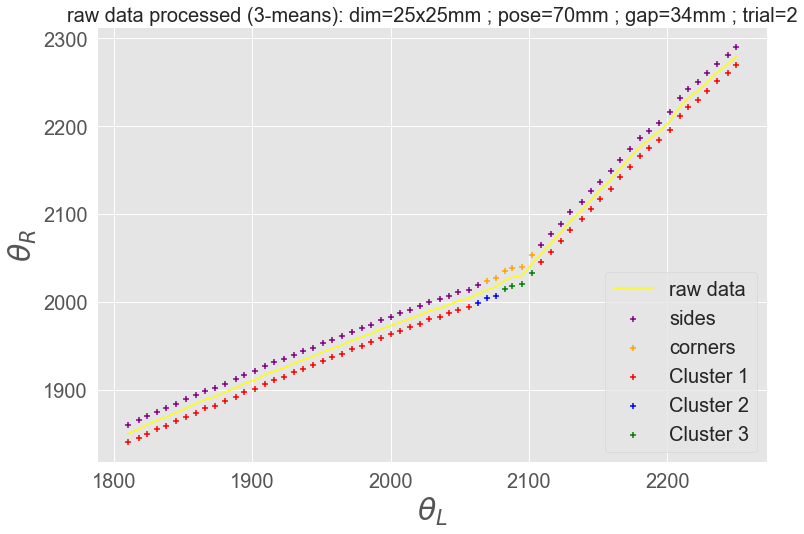

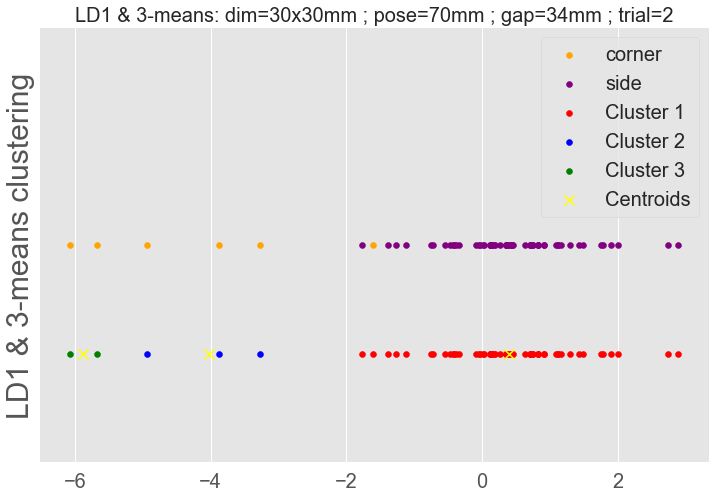

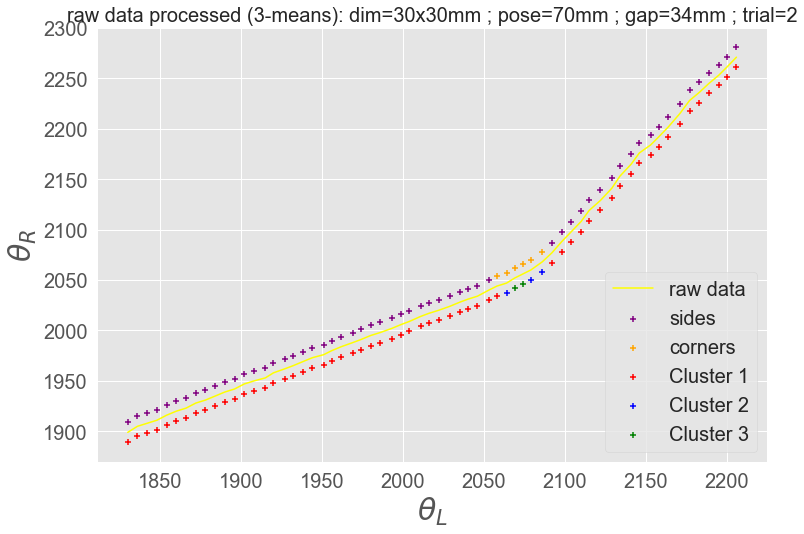

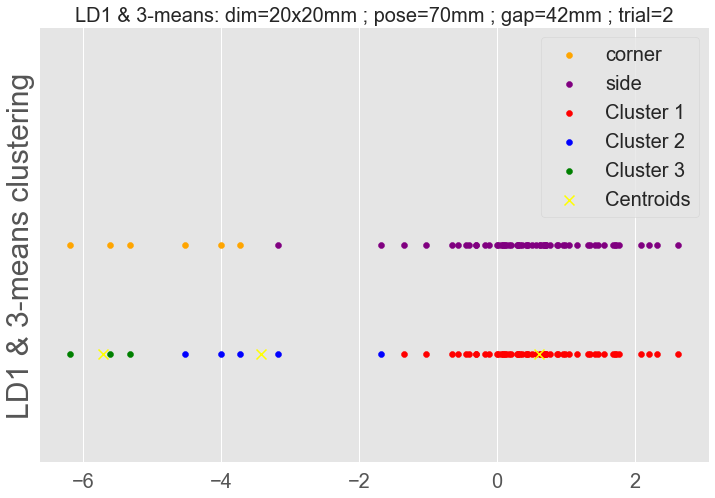

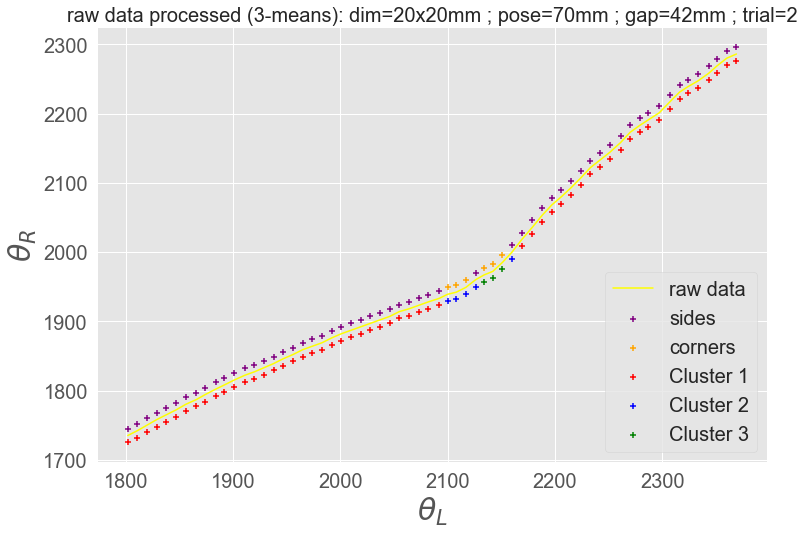

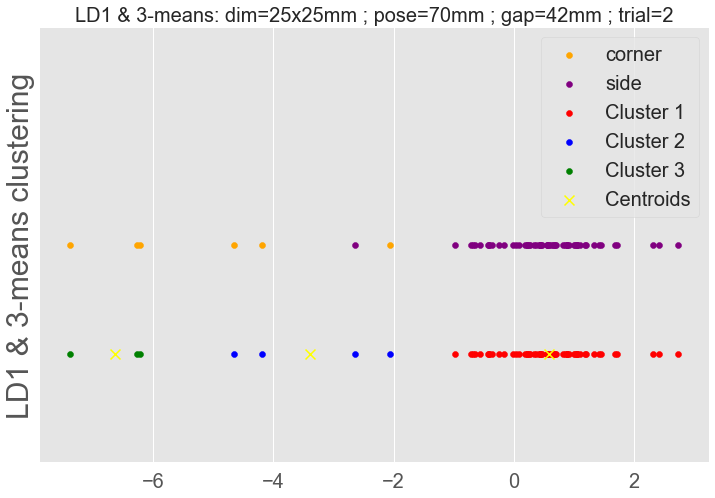

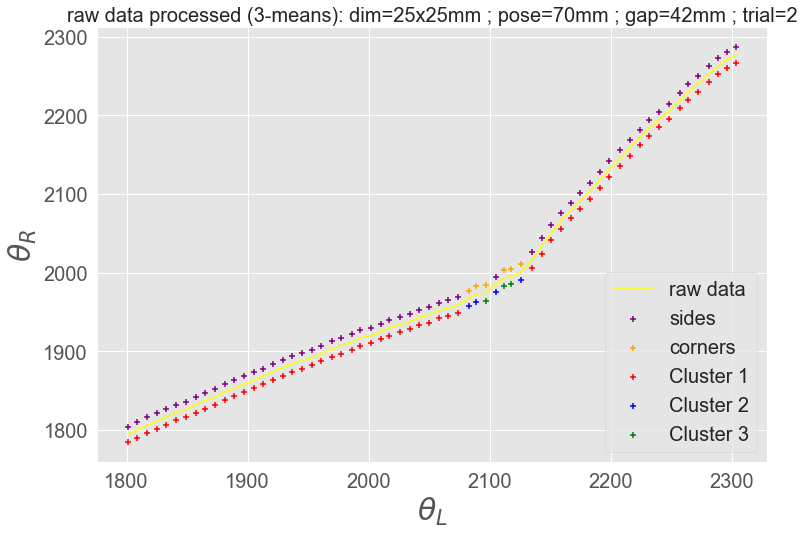

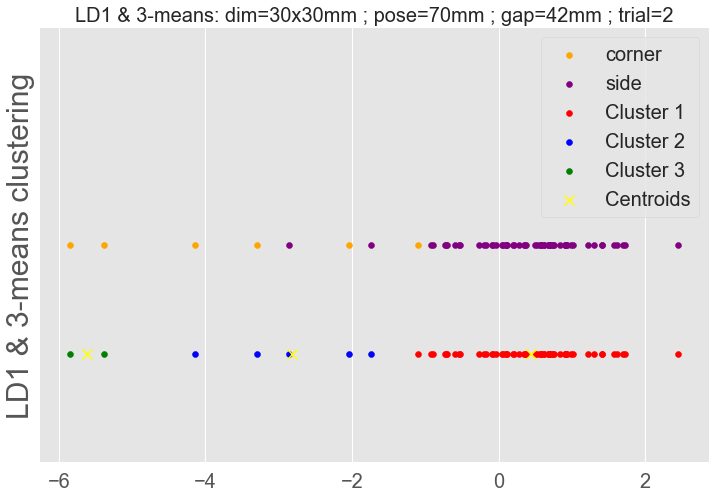

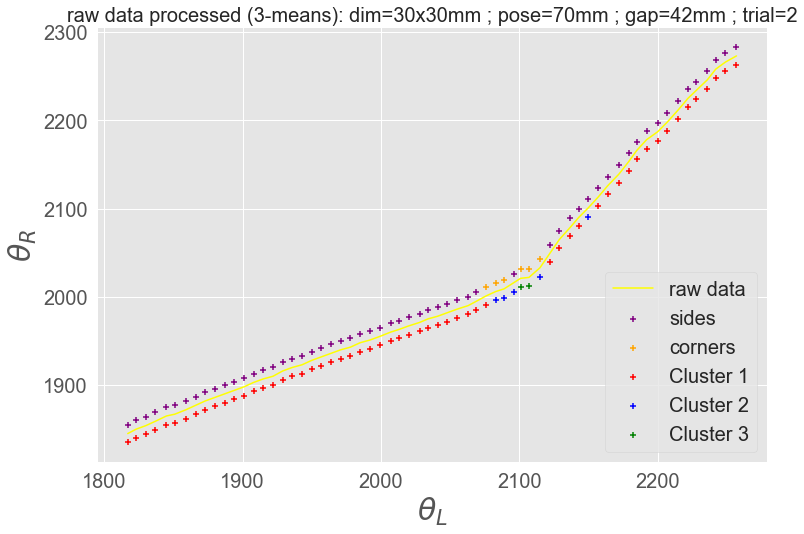

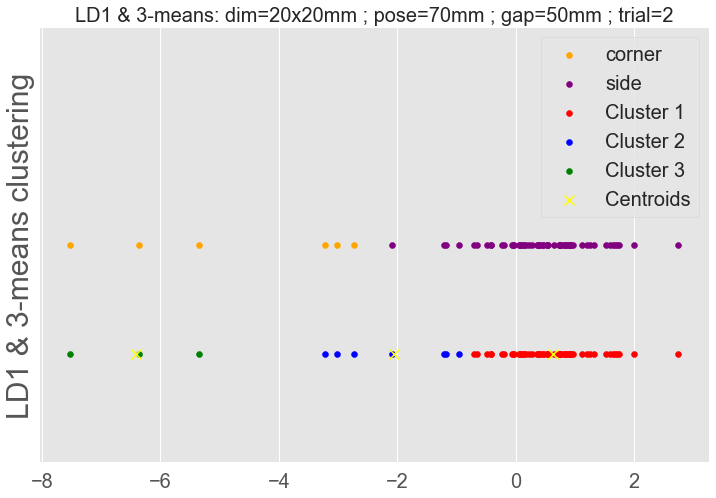

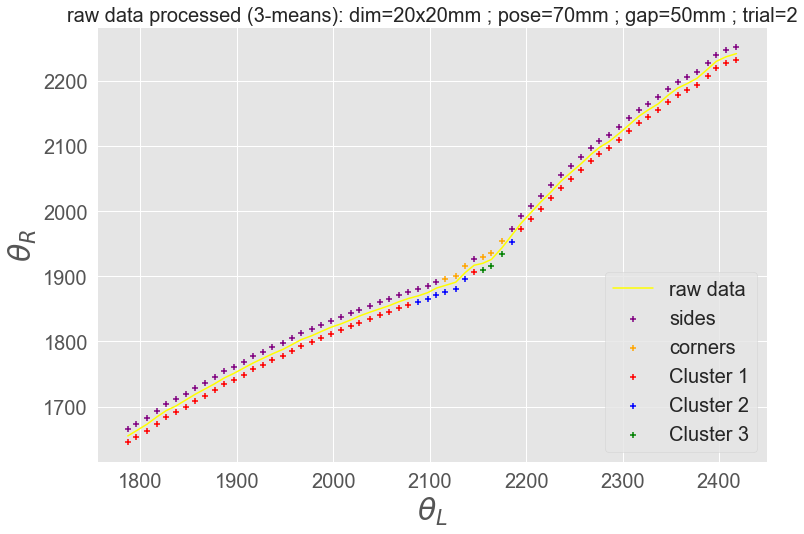

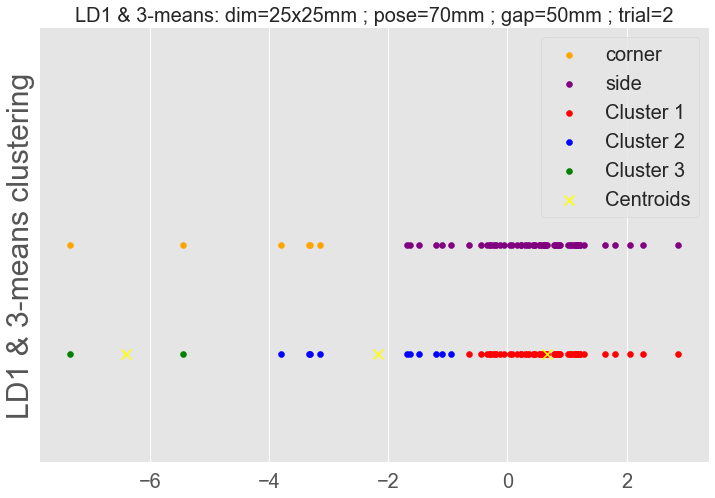

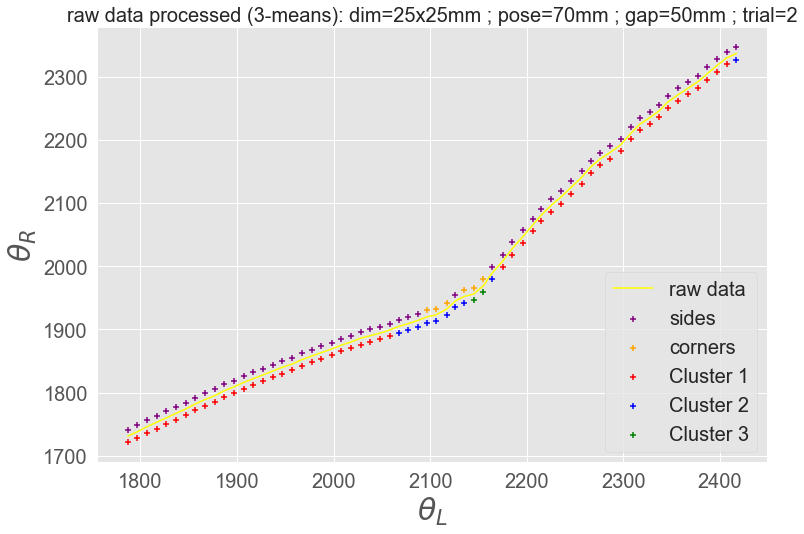

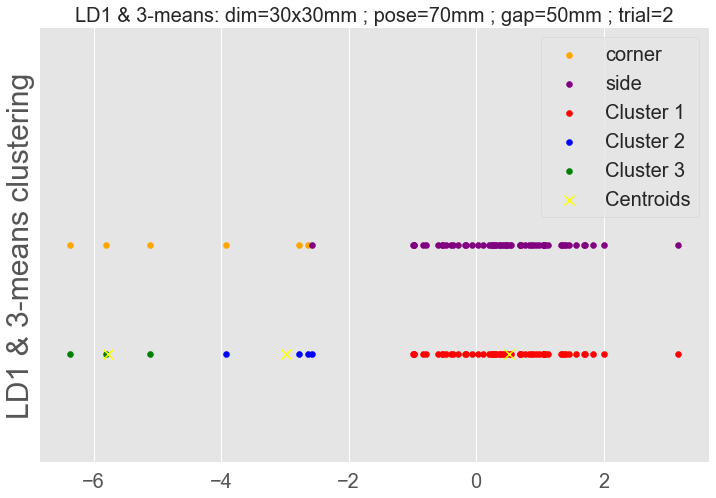

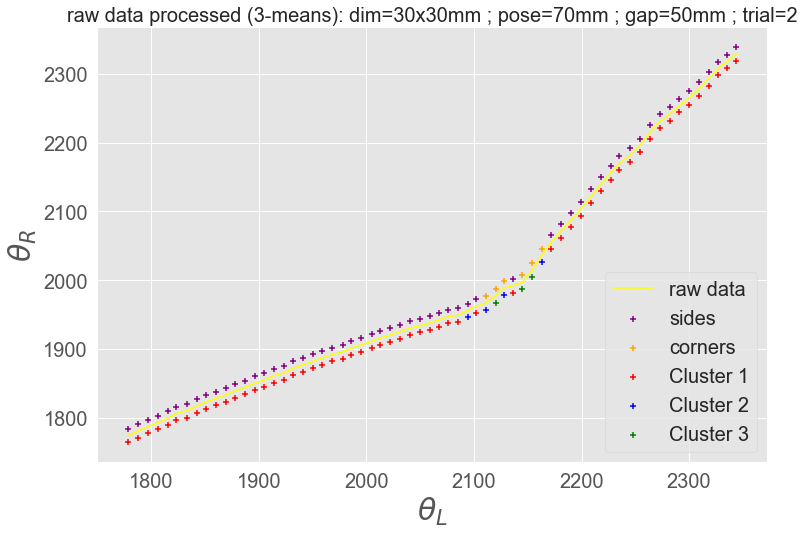

In [23]:
with open('data_sqrt_trial_classified.json') as f:
    full_data_dict = json.load(f)

poses_drf = [60,65,70]
finger_gaps = [34,42,50]
sqrt_sides = [20,25,30]
trials = [1,2]
f1_scores = {}

for trial in trials:
    for pose in poses_drf:
        for gap in finger_gaps:
            for dim in sqrt_sides:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                data_dict = full_data_dict[dict_key]
    
                data_list = [data_dict['LF_motion1'],data_dict['RF_motion1']]
                data_array = np.array(data_list).T

                temp_data_array = np.append(data_array[np.newaxis,0,:,0],data_array[np.newaxis,1,:,0],axis=0)
                temp_data_array = np.append(temp_data_array,data_array[np.newaxis,0,:,1],axis=0)
                temp_data_array = np.append(temp_data_array,data_array[np.newaxis,1,:,1],axis=0)
                data_array = np.append(temp_data_array,data_array[np.newaxis,2,:,0],axis=0).T
                angle_array = data_array[:,:4].astype(float)
                # CREATE A DATAFRAME BY WINDOWING THE RAW AND INCREMENTING THE POSITION OF THE WINDOW
                rows,columns = data_array.shape
                window_size = 5 # needs to be odd
                half_window_size = math.floor(window_size/2)
                data_window = np.zeros((rows-half_window_size*2,window_size*4+1)) #+1 for the class
                corners = []
                sides = []
                for i in range(half_window_size,rows-half_window_size):
                    temp_window = np.append(data_array[i-half_window_size:half_window_size+i+1,:].T[0],
                                            data_array[i-half_window_size:half_window_size+i+1,:].T[1])
                    temp_window = np.append(temp_window,
                                            data_array[i-half_window_size:half_window_size+i+1,:].T[2])
                    temp_window = np.append(temp_window,
                                            data_array[i-half_window_size:half_window_size+i+1,:].T[3])
                    if 'corner' in data_array[i-half_window_size+1:half_window_size+i+1-1,:].T[4]:
                        # CLASS 2 IS THE CORNER
                        corners += [angle_array[i].tolist()]
                        data_window[i-half_window_size] = np.append(temp_window,np.array([2]))
                    else:
                        # CLASS 1 IS THE SIDE
                        sides += [angle_array[i].tolist()]
                        data_window[i-half_window_size] = np.append(temp_window,np.array([1]))
    
                #print(data_window)
                names = []
                for j in range(window_size):
                    names += ["angleLF"+str(j+1)]
                for j in range(window_size):
                    names += ["timeLF"+str(j+1)]
                for j in range(window_size):
                    names += ["angleRF"+str(j+1)]
                for j in range(window_size):
                    names += ["timeRF"+str(j+1)]
                names += ["class"]

                # DATA FRAME PANDAS
                df = pd.DataFrame(data=data_window,columns = names)
                df["class"].replace({1.0: "side", 2.0: "corner"}, inplace=True)
                df.dropna(how='all', inplace=True)
                windows = df[names[:len(names)-1]]
                labels = df[names[-1]]

                corners_pos = np.array(corners)
                sides_pos = np.array(sides)

                df.head()
                
                ##########################################################################################
                ############################# Plot the positions of the finger ###########################
                ##########################################################################################
                #plot_pos_fingers(sides_pos,corners_pos,dim,pose,gap,trial)

                ##########################################################################################
                ############################# LDA with sklearn ###########################
                ##########################################################################################

                # Preparation of the data for LDA
                X = df.iloc[:, 0:-1].values
                le = LabelEncoder()
                y = le.fit_transform(df['class'])

                # Import LDA from sklearn
                lda = LinearDiscriminantAnalysis()
                lda_X = lda.fit_transform(X, y)
                print("The explained variance ratio of lda is : ", lda.explained_variance_ratio_)

                ##########################################################################################
                ############################# Plot projection on feature vectors ###########################
                ##########################################################################################
                #plot_proj_ld1(lda_X,y,dim,pose,gap,trial)
                
                ##########################################################################################
                #################################### K-means #############################################
                ##########################################################################################

                # 2-means clustering 
                k2means = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
                y_k2means = k2means.fit_predict(lda_X)

                # 3-mens clustering
                centroids = np.array([[0],[-5.5],[-6]])
                k3means = KMeans(n_clusters=3, init =centroids, max_iter=300, n_init=10,random_state=0 )
                y_k3means = k3means.fit_predict(lda_X)

                ##########################################################################################
                #plot_ld1_2means(lda_X,y,y_k2means,dim,pose,gap,trial)
                ##########################################################################################
                #plot_raw_2means(sides_pos,corners_pos,angle_array,half_window_size,y_k2means,dim,pose,gap,trial)
                ##########################################################################################
                plot_ld1_3means(lda_X,y,y_k3means,dim,pose,gap,trial)
                ##########################################################################################
                plot_raw_3means(sides_pos,corners_pos,angle_array,half_window_size,y_k3means,dim,pose,gap,trial)
                ##########################################################################################

                ##########################################################################################
                #################################### F1-score ############################################
                ##########################################################################################

                # we need to change "y" before beca
                y_true = []
                for i in range(y.shape[0]):
                    if y[i] == 0:
                        y_true += [1]
                    else:
                        y_true += [0]

                f1_score_2means = f1_score(y_true,y_k2means)
                print("The f1_score of the 2-means is : ",f1_score_2means)
                print(y_true)

                # f1-score on just the corner identification
                y_k3_corner = []
                for i in range(len(y_k3means.tolist())):
                    if y_k3means[i] == 2:
                        y_k3_corner += [1]
                    else :
                        y_k3_corner += [y_k3means[i]]
                y_k3_corner = np.array(y_k3_corner)

                f1_score_3means = f1_score(y_true,y_k3_corner)
                print("The f1_score of the 3-means for global corner identification is : ",f1_score_3means)

                # f1-score on the number of corners
                u = 0
                v = 0
                y_true_corners = []
                for i in range(len(y_true)):
                    if y_true[i] == 1 and v == 0:
                        y_true_corners += [y_true[i]]
                        u = 1
                    elif y_true[i] == 0 and u==1:
                        y_true_corners += [y_true[i]]
                        v = 1
                    elif y_true[i] == 1 and v==1:
                        y_true_corners += [2]
                    else:
                        y_true_corners += [y_true[i]]
                acc_3means = accuracy_score(y_true_corners,y_k3means)
                print("The f1_score of the 3-means for each corner identification (micro/or accuracy) is : ",
                      acc_3means)

                f1_scores[dict_key] = {
                    "The f1_score 2-means corner identification" : f1_score_2means,
                    "The f1_score 3-means global corner identification" : f1_score_3means,
                    "The f1_score 3-means each corner identification" : acc_3means      
                }


In [ ]:
# Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.

In [19]:
with open("f1_scores_sqrt_dim_new_w_5_trials_shrading_centroids.json", 'w') as f:
    indent = 2  # is not needed but makes the file human-readable
    json.dump(f1_scores, f, indent=2)

# Create a table with the result

In [20]:
with open('f1_scores_sqrt_dim_new_w_5_trials_shrading_centroids.json') as f:
    dict_f1 = json.load(f)

poses_drf = [60,65,70]
finger_gaps = [34,42,50]
sqrt_sides = [20,25,30]
trials = [1,2]

print("\nTABLE 1 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

# print each data item.
for gap in finger_gaps:
    for pose in poses_drf:
        for dim in sqrt_sides:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))


print("\nTABLE 2 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

for pose in poses_drf:
    for gap in finger_gaps:
        for dim in sqrt_sides:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))


print("\nTABLE 3 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

for dim in sqrt_sides:
    for gap in finger_gaps:
        for pose in poses_drf:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))




TABLE 1 

DIMENSION    POSE         GAP          F1 2-Means   F1 3-Means   F1 3-Means (each)
20           60           34           60           1.0          1.0         
20           60           34           60           0.909        1.0         
25           60           34           60           1.0          0.667       
25           60           34           60           0.889        0.727       
30           60           34           60           0.769        0.5         
30           60           34           60           0.833        0.667       
20           65           34           65           1.0          1.0         
20           65           34           65           0.909        0.909       
25           65           34           65           1.0          0.923       
25           65           34           65           0.909        1.0         
30           65           34           65           0.923        0.923       
30           65           34           65       

# Calculate the average f1-score

In [21]:
with open('f1_scores_sqrt_dim_new_w_5_trials_shrading_centroids.json') as f:
    dict_f1 = json.load(f)

poses_drf = [60,65,70]
finger_gaps = [34,42,50]
sqrt_sides = [20,25,30]
trials = [1,2]

path = 'f1_scores_sqrt_dim_new_w_5_trials_shrading_centroids.txt'
f1_file = open(path,'w')

title = 'All the F1-score and accuracy of the squares simulation for window of size 5 \n'
f1_file.write(title)


################ same size ################ 
f1_file.write('\nSAME SIZE \n\n')
print('\nSAME SIZE \n')

sum_f1_score_2means = 0
sum_f1_score_3means_glob = 0
sum_f1_score_3means_each = 0
nb_f1_Scores = 0

for dim in sqrt_sides:
    for gap in finger_gaps:
        for pose in poses_drf:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                sum_f1_score_2means += f1_2means
                sum_f1_score_3means_glob += f1_3means_glob
                sum_f1_score_3means_each += f1_3means_each
                nb_f1_Scores += 1
    print('The average f1-score for squares of dim =',str(dim),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares of dim ='+str(dim)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares of dim =',str(dim),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares of dim ='+str(dim)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares of dim =',str(dim),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares of dim ='+str(dim)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0
    

################ same pose ################ 
print('\nSAME POSE \n')
f1_file.write('\nSAME POSE \n\n')
sum_f1_score_2means = 0
sum_f1_score_2means_glob = 0
sum_f1_score_2means_each = 0
nb_f1_Scores = 0
for pose in poses_drf:
    for dim in sqrt_sides:
        for gap in finger_gaps:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                sum_f1_score_2means += f1_2means
                sum_f1_score_3means_glob += f1_3means_glob
                sum_f1_score_3means_each += f1_3means_each
                nb_f1_Scores += 1
    print('The average f1-score for squares with pose =',str(pose),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with pose ='+str(pose)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares with pose =',str(pose),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with pose ='+str(pose)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares with pose =',str(pose),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares with pose ='+str(pose)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0


################ same gap ################ 
f1_file.write('\nSAME GAP \n\n')
print('\nSAME GAP \n\n')
sum_f1_score_2means = 0
sum_f1_score_2means_glob = 0
sum_f1_score_2means_each = 0
nb_f1_Scores = 0
for gap in finger_gaps:
    for dim in sqrt_sides:
        for pose in poses_drf:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                sum_f1_score_2means += f1_2means
                sum_f1_score_3means_glob += f1_3means_glob
                sum_f1_score_3means_each += f1_3means_each
                nb_f1_Scores += 1
    print('The average f1-score for squares with fingers gap =',str(gap),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with fingers gap ='+str(gap)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares with fingers gap =',str(gap),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with fingers gap ='+str(gap)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares with fingers gap =',str(gap),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares with fingers gap ='+str(gap)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0

################ total average ################ 
f1_file.write('\nTOTAL AVERAGE \n\n')
print('\nTOTAL AVERAGE \n\n')
sum_f1_score_2means = 0
sum_f1_score_3means_glob = 0
sum_f1_score_3means_each = 0
nb_f1_Scores = 0
for gap in finger_gaps:
    for dim in sqrt_sides:
        for pose in poses_drf:
            for trial in trials:
                dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)+'_'+str(trial)
                dict_value = dict_f1[dict_key]
                f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
                f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
                f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
                sum_f1_score_2means += f1_2means
                sum_f1_score_3means_glob += f1_3means_glob
                sum_f1_score_3means_each += f1_3means_each
                nb_f1_Scores += 1
print('The total average f1-score for squares and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
f1_file.write('The total average f1-score for squares and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
print('The total average f1-score for squares and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
f1_file.write('The total average f1-score for squares and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
print('The total average accuracy for squares and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
f1_file.write('The total average accuracy for squares and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')

f1_file.close()


SAME SIZE 

The average f1-score for squares of dim = 20  and 2-means clustering :  0.9133333333333332
The average f1-score for squares of dim = 20  and 3-means clustering :  0.8322222222222222
The average accuracy for squares of dim = 20  and 3-means clustering :  0.881888888888889 

The average f1-score for squares of dim = 25  and 2-means clustering :  0.8748888888888889
The average f1-score for squares of dim = 25  and 3-means clustering :  0.7932222222222222
The average accuracy for squares of dim = 25  and 3-means clustering :  0.8716111111111111 

The average f1-score for squares of dim = 30  and 2-means clustering :  0.7018333333333333
The average f1-score for squares of dim = 30  and 3-means clustering :  0.6901666666666667
The average accuracy for squares of dim = 30  and 3-means clustering :  0.8170000000000001 


SAME POSE 

The average f1-score for squares with pose = 60  and 2-means clustering :  0.9027222222222223
The average f1-score for squares with pose = 60  and 3-m

- poor performance for the small square for the 3-means as the window of are overlapping 
- for gap 42 problems

